# EAST WEST AIRLINES DATA

# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy  as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
%matplotlib inline
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sil
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from itertools import product
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

/var/folders/2_/9ynm76m50071d99l5fzzwtj40000gn/T/ipykernel_71089/2967277016.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
ls

Airlines+Data.xlsx               ProblemSatement(crime_data).txt
CLUSTERING AIRLINES.ipynb        Problem_Statement(Airlines).txt
CLUSTERING CRIME .ipynb          crime_data.csv
EastWestAirlines.xlsx


In [3]:
#importing dataset from excel 
data=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
#rename the columns which have special charecters
data.rename(columns={"ID#":"ID","Award?":"award"},inplace=True)

#show dataframe
data

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     1     28143    0           1          1          1          174           
1     2     19244    0           1          1          1          215           
2     3     41354    0           1          1          1          4123          
3     4     14776    0           1          1          1          500           
4     5     97752    0           4          1          1          43300         
...  ..       ...   ..          ..         ..         ..            ...         
3994  4017  18476    0           1          1          1          8525          
3995  4018  64385    0           1          1          1          981           
3996  4019  73597    0           3          1          1          25447         
3997  4020  54899    0           1          1          1          500           
3998  4021  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0     1            0                  0                7000                
1     2            0                  0                6968                
2     4            0                  0                7034                
3     1            0                  0                6952                
4     26           2077               4                6935                
...   ..            ...              ..                 ...                
3994  4            200                1                1403                
3995  5            0                  0                1395                
3996  8            0                  0                1402                
3997  1            500                1                1401                
3998  0            0                  0                1398                

      award  
0     0      
1     0      
2     0      
3     0      
4     1      
...  ..      
3994  1      
3995  1      
3996  1      
3997  0      
3998  0      

[3999 rows x 12 columns]

#  EXPLORATORY DATA EXPLORATION 

In [4]:
data.describe()

ID       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03  3999.000000   3999.000000  3999.000000   
mean   2014.819455  7.360133e+04  144.114529    2.059515     1.014504      
std    1160.764358  1.007757e+05  773.663804    1.376919     0.147650      
min    1.000000     0.000000e+00  0.000000      1.000000     1.000000      
25%    1010.500000  1.852750e+04  0.000000      1.000000     1.000000      
50%    2016.000000  4.309700e+04  0.000000      1.000000     1.000000      
75%    3020.500000  9.240400e+04  0.000000      3.000000     1.000000      
max    4021.000000  1.704838e+06  11148.000000  5.000000     3.000000      

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000  3999.000000    3999.00000   3999.000000         
mean   1.012253     17144.846212   11.60190     460.055764          
std    0.195241     24150.967826   9.60381      1400.209171         
min    1.000000     0.000000       0.00000      0.000000            
25%    1.000000     1250.000000    3.00000      0.000000            
50%    1.000000     7171.000000    12.00000     0.000000            
75%    1.000000     23800.500000   17.00000     311.000000          
max    5.000000     263685.000000  86.00000     30817.000000        

       Flight_trans_12  Days_since_enroll        award  
count  3999.000000      3999.00000         3999.000000  
mean   1.373593         4118.55939         0.370343     
std    3.793172         2065.13454         0.482957     
min    0.000000         2.00000            0.000000     
25%    0.000000         2330.00000         0.000000     
50%    0.000000         4096.00000         0.000000     
75%    1.000000         5790.50000         1.000000     
max    53.000000        8296.00000         1.000000

In [5]:
data.corr()

ID   Balance  Qual_miles  cc1_miles  cc2_miles  \
ID                 1.000000 -0.243737 -0.019374   -0.224465   0.020291    
Balance           -0.243737  1.000000  0.108722    0.338344  -0.008804    
Qual_miles        -0.019374  0.108722  1.000000    0.007931  -0.013923    
cc1_miles         -0.224465  0.338344  0.007931    1.000000  -0.068223    
cc2_miles          0.020291 -0.008804 -0.013923   -0.068223   1.000000    
cc3_miles         -0.014707  0.035243 -0.007779    0.060555  -0.006166    
Bonus_miles       -0.203012  0.403487  0.031021    0.825200  -0.003969    
Bonus_trans       -0.146915  0.324935  0.050725    0.608943   0.064399    
Flight_miles_12mo -0.031013  0.217551  0.126774    0.037370   0.010598    
Flight_trans_12   -0.052096  0.255700  0.144004    0.041333   0.028284    
Days_since_enroll -0.964988  0.263129  0.017312    0.230849  -0.005807    
award             -0.177901  0.178494  0.095256    0.335457   0.005332    

                   cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
ID                -0.014707  -0.203012    -0.146915    -0.031013            
Balance            0.035243   0.403487     0.324935     0.217551            
Qual_miles        -0.007779   0.031021     0.050725     0.126774            
cc1_miles          0.060555   0.825200     0.608943     0.037370            
cc2_miles         -0.006166  -0.003969     0.064399     0.010598            
cc3_miles          1.000000   0.204134     0.097313    -0.001777            
Bonus_miles        0.204134   1.000000     0.603180     0.183536            
Bonus_trans        0.097313   0.603180     1.000000     0.377216            
Flight_miles_12mo -0.001777   0.183536     0.377216     1.000000            
Flight_trans_12   -0.001117   0.185261     0.432364     0.869193            
Days_since_enroll  0.010832   0.210397     0.161262     0.037271            
award              0.023484   0.373506     0.333893     0.217715            

                   Flight_trans_12  Days_since_enroll     award  
ID                -0.052096        -0.964988          -0.177901  
Balance            0.255700         0.263129           0.178494  
Qual_miles         0.144004         0.017312           0.095256  
cc1_miles          0.041333         0.230849           0.335457  
cc2_miles          0.028284        -0.005807           0.005332  
cc3_miles         -0.001117         0.010832           0.023484  
Bonus_miles        0.185261         0.210397           0.373506  
Bonus_trans        0.432364         0.161262           0.333893  
Flight_miles_12mo  0.869193         0.037271           0.217715  
Flight_trans_12    1.000000         0.059260           0.247909  
Days_since_enroll  0.059260         1.000000           0.188121  
award              0.247909         0.188121           1.000000

In [6]:
data.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
award                0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
#diffrent cc miles contain diffrent max values
#checking the unique values of cc miles
print("cc1 miles : ",data.cc1_miles.unique())
print("cc2 miles : ",data.cc2_miles.unique())
print("cc3 miles : ",data.cc3_miles.unique())

cc1 miles :  [1 4 3 2 5]
cc2 miles :  [1 2 3]
cc3 miles :  [1 3 2 4 5]


In [9]:
data.value_counts().sum()

3999

In [10]:
data.duplicated().sum()

0

# DATA VISUALISATIONS

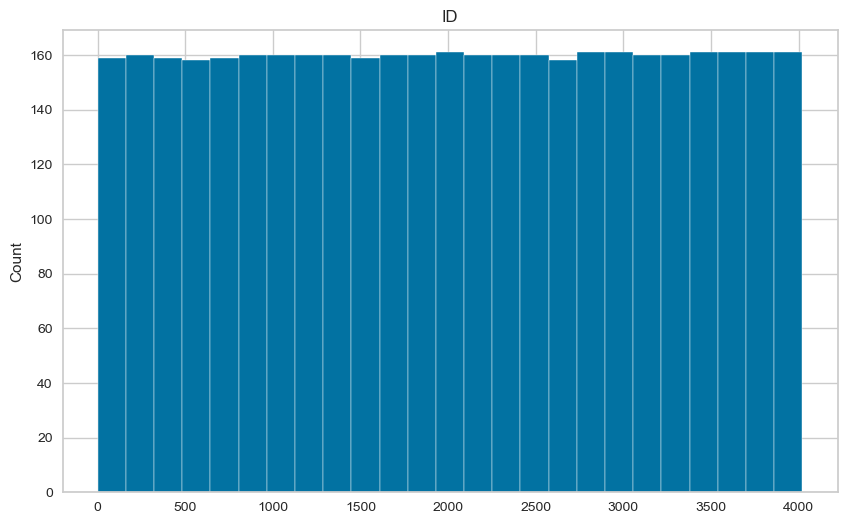

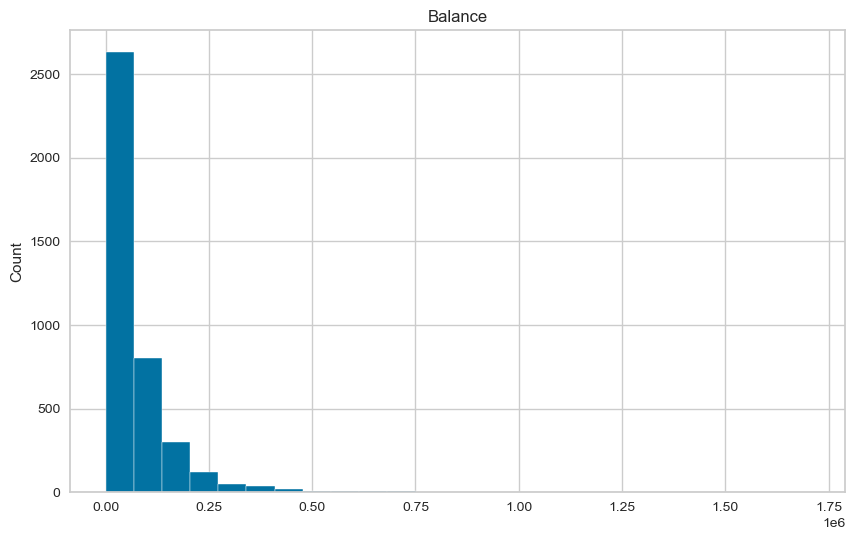

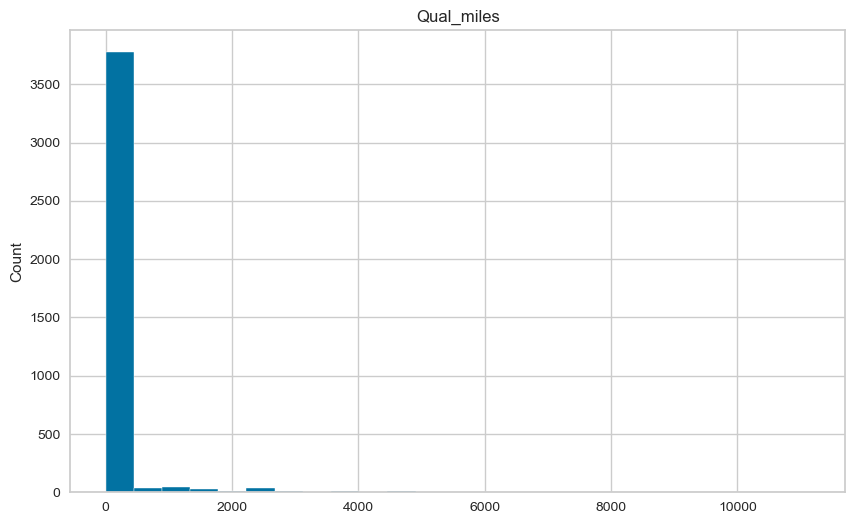

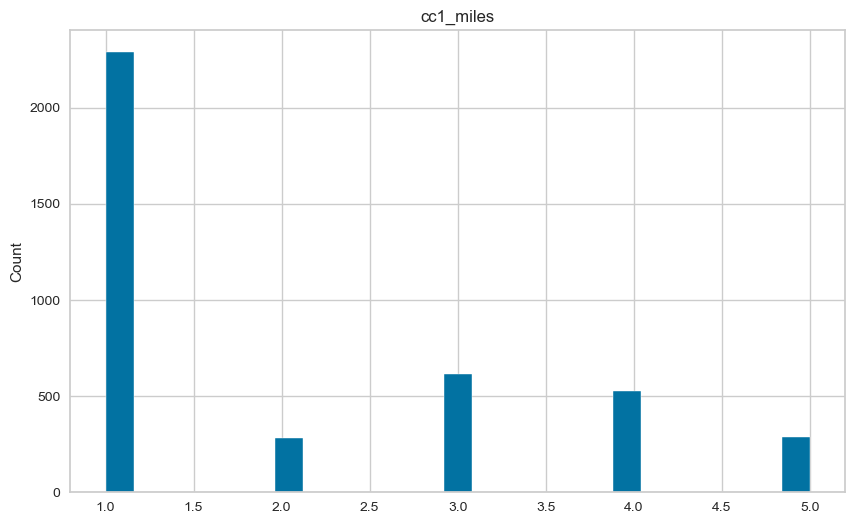

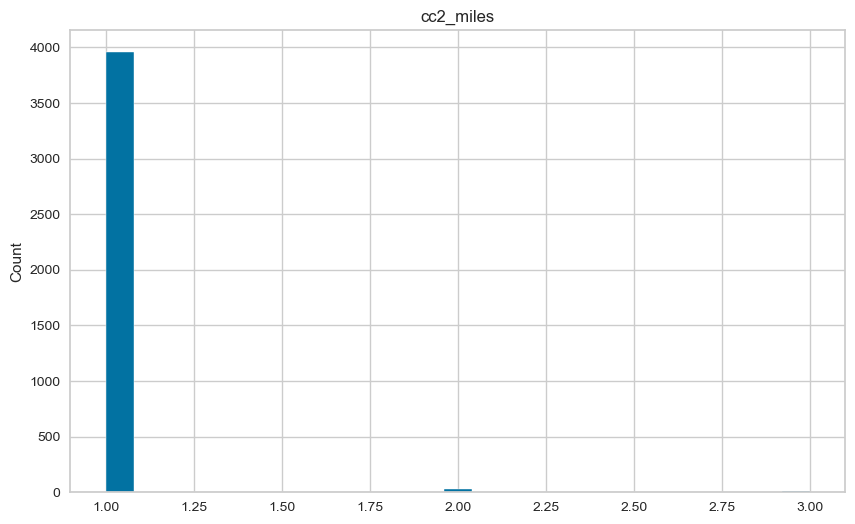

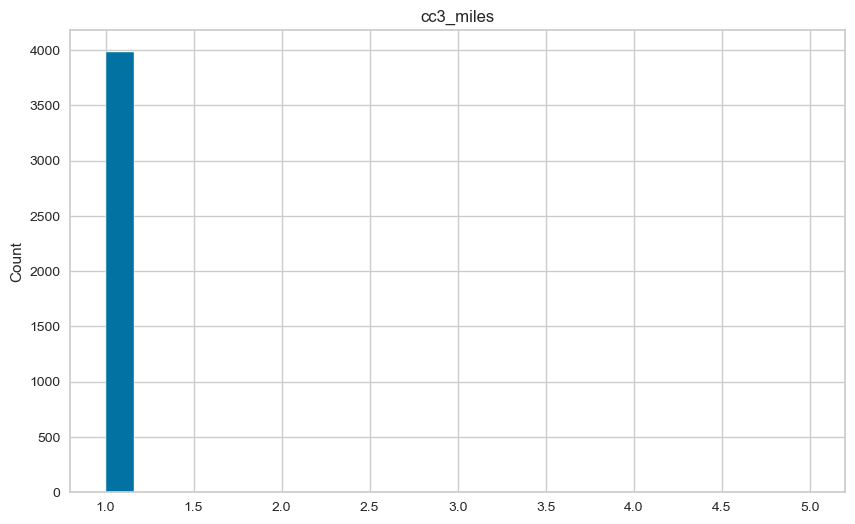

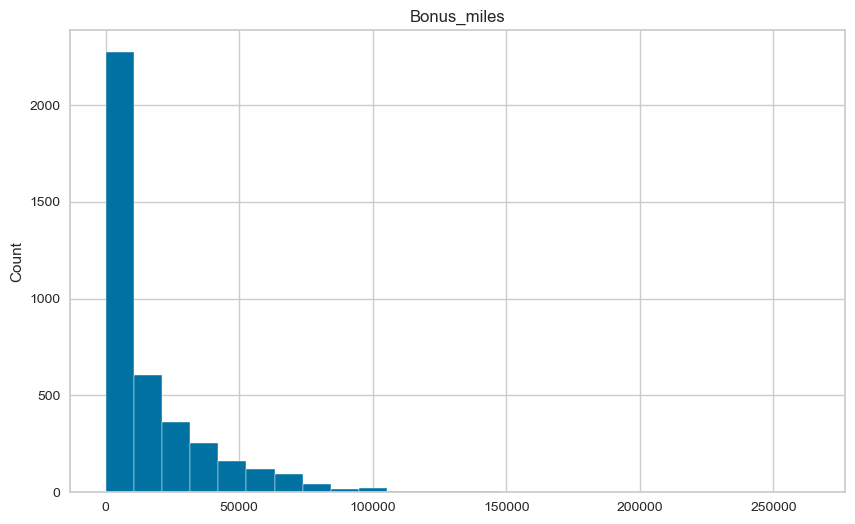

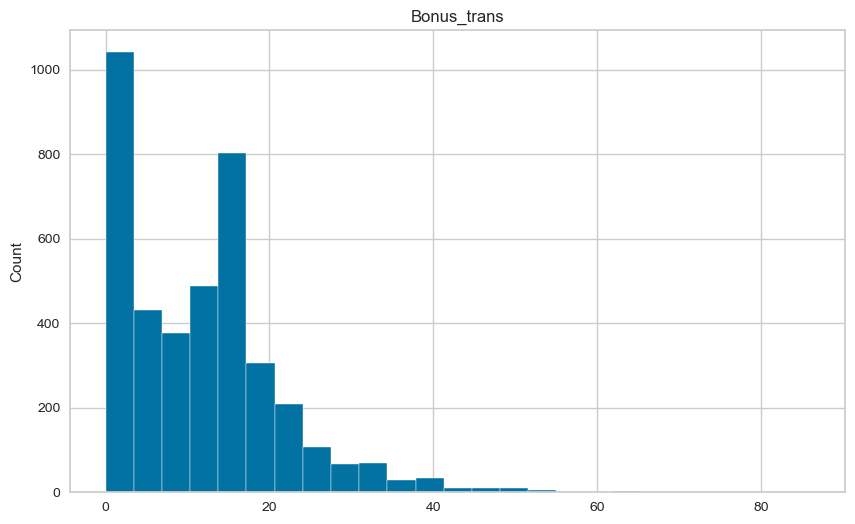

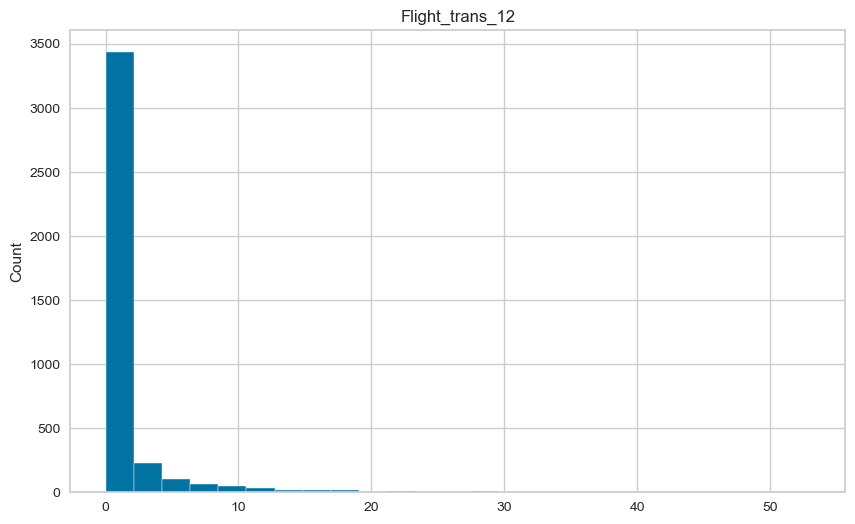

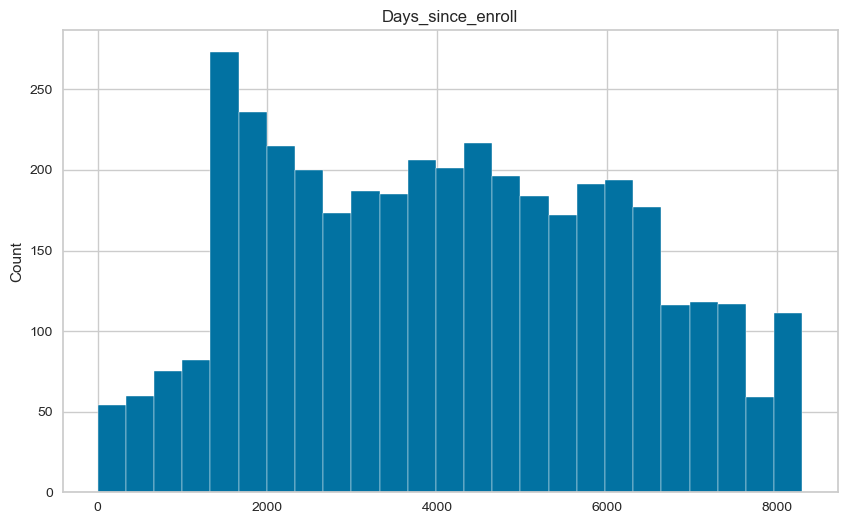

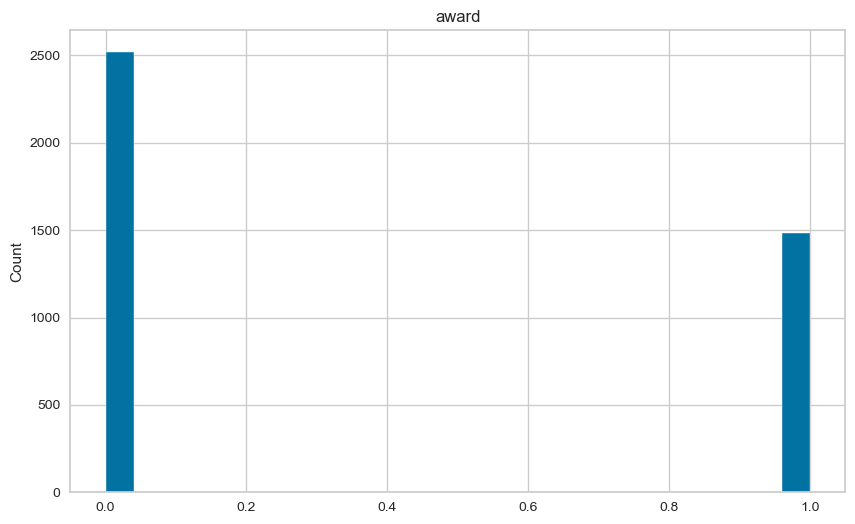

In [11]:
for i in data.columns:
    plt.figure(figsize=[10,6])
    data[i].hist(bins=25)
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

ID


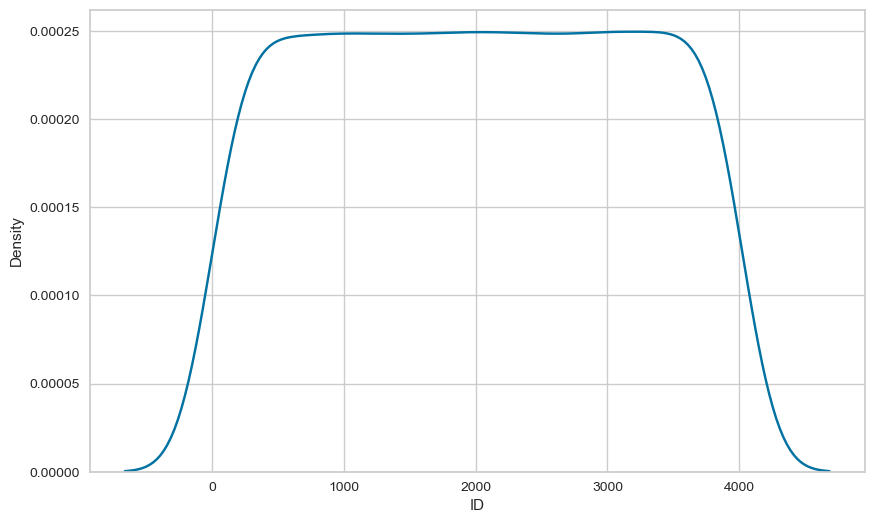

Balance


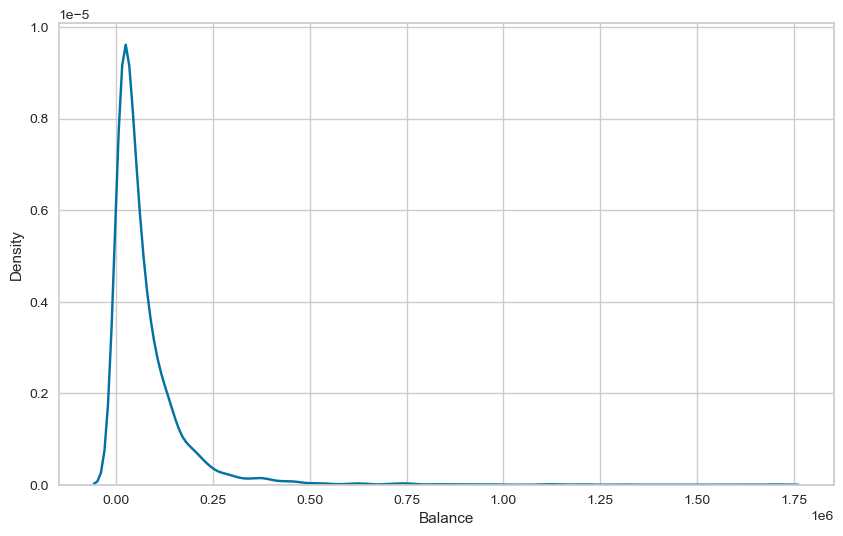

Qual_miles


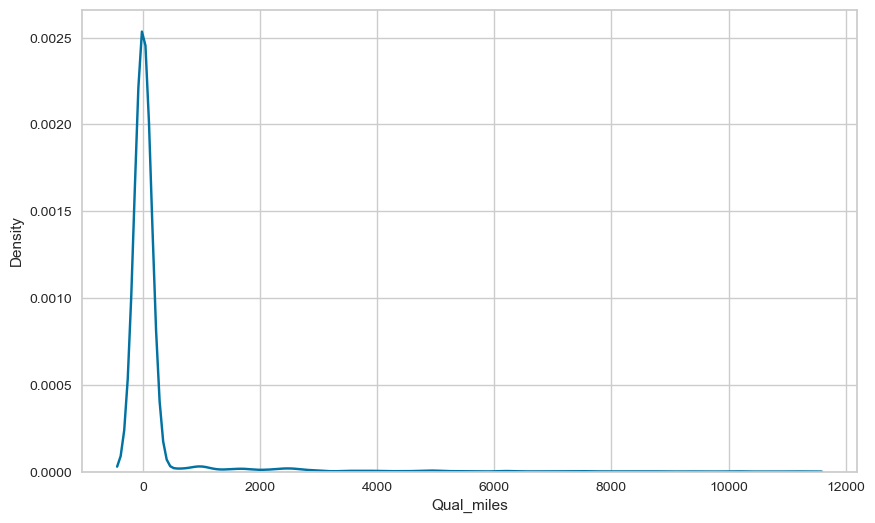

cc1_miles


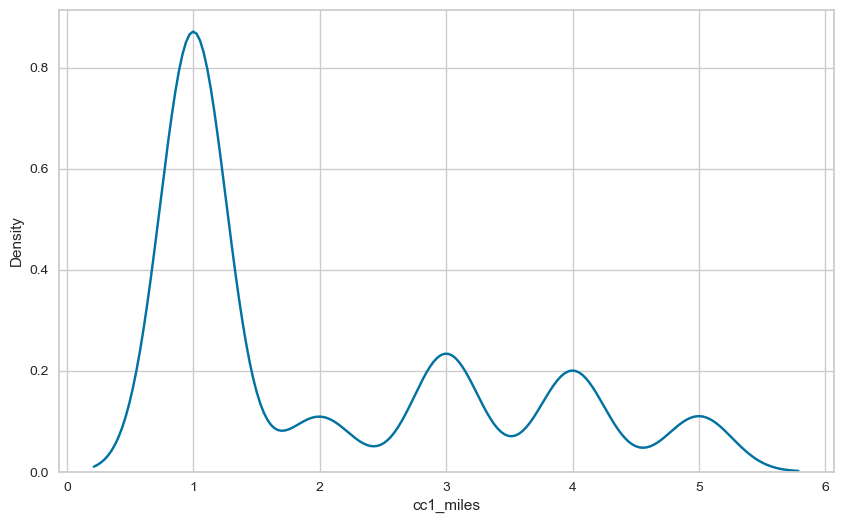

cc2_miles


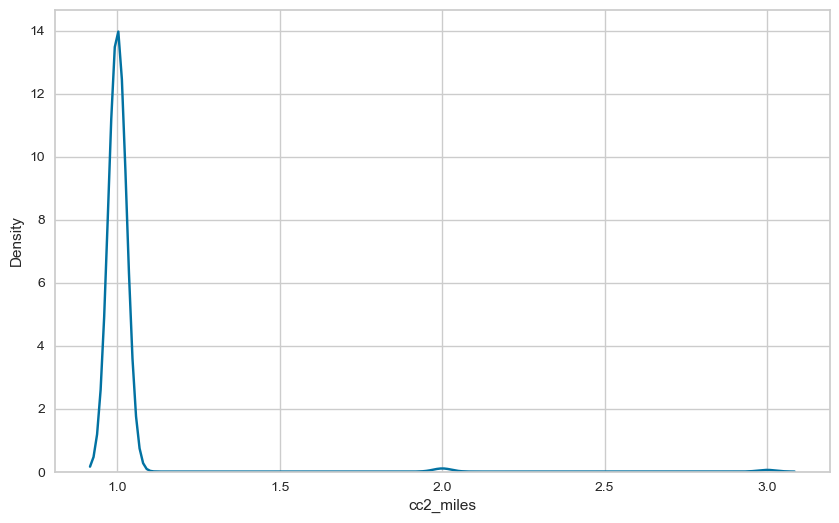

cc3_miles


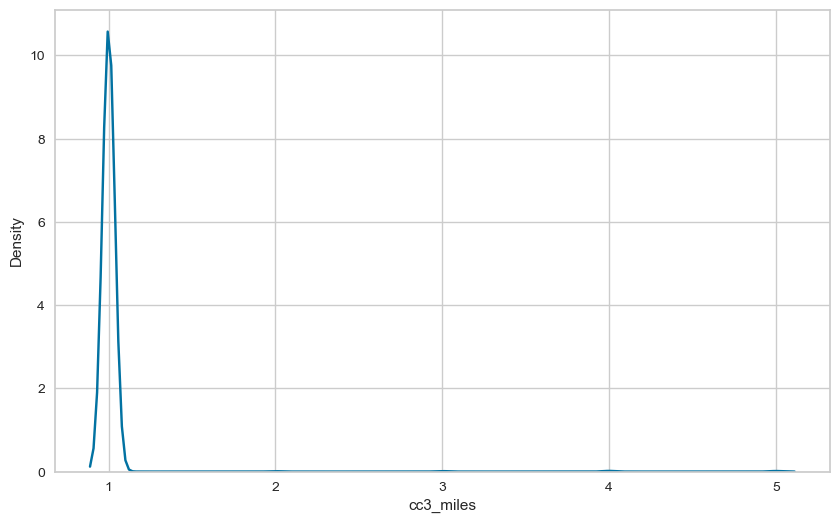

Bonus_miles


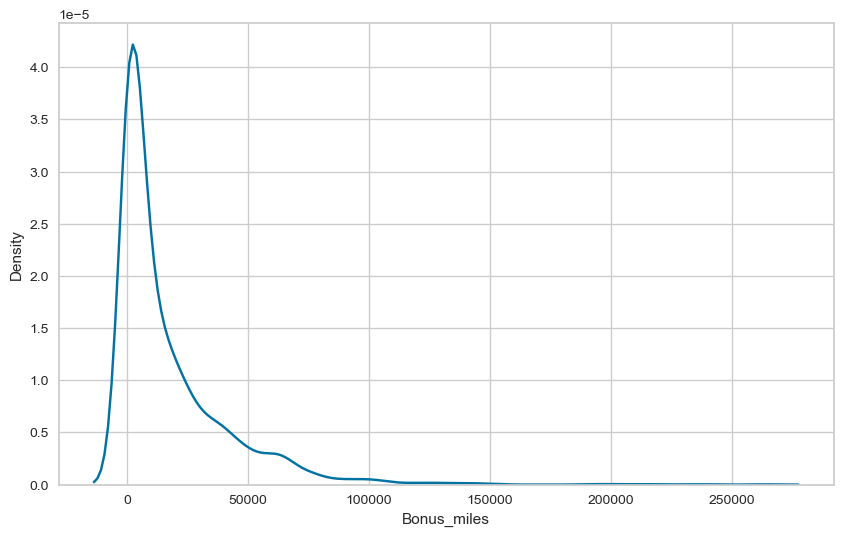

Bonus_trans


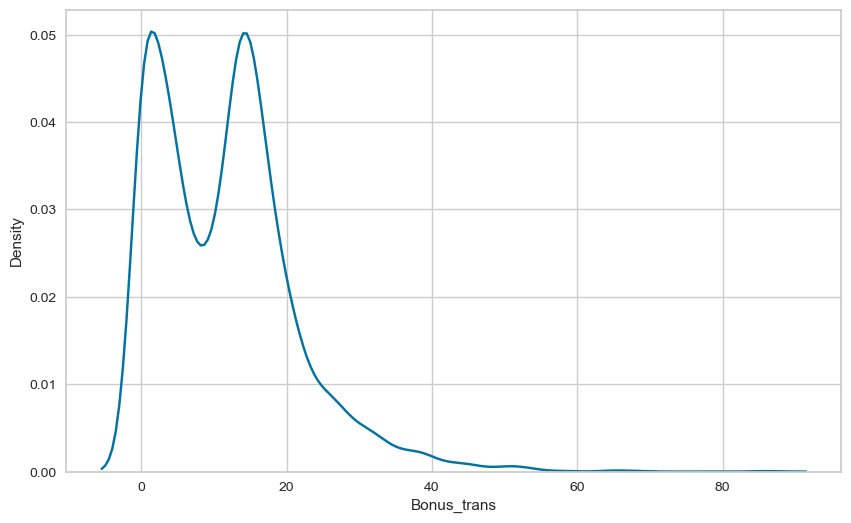

Flight_miles_12mo


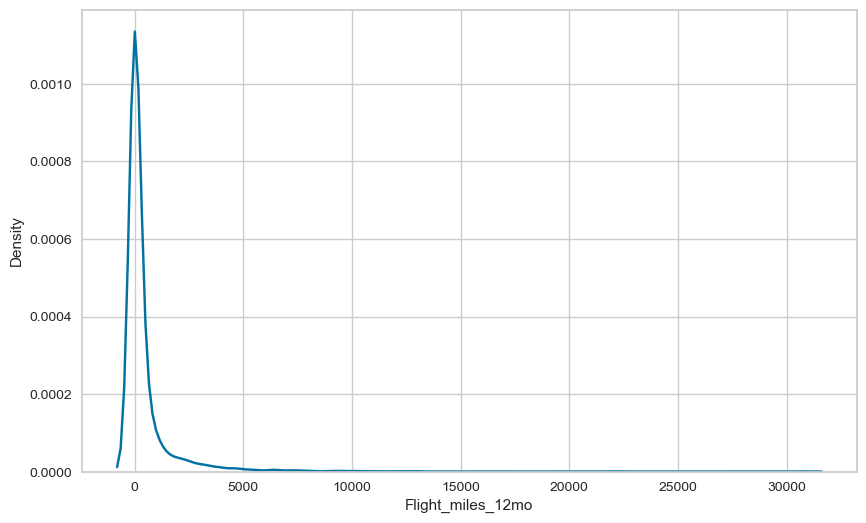

Flight_trans_12


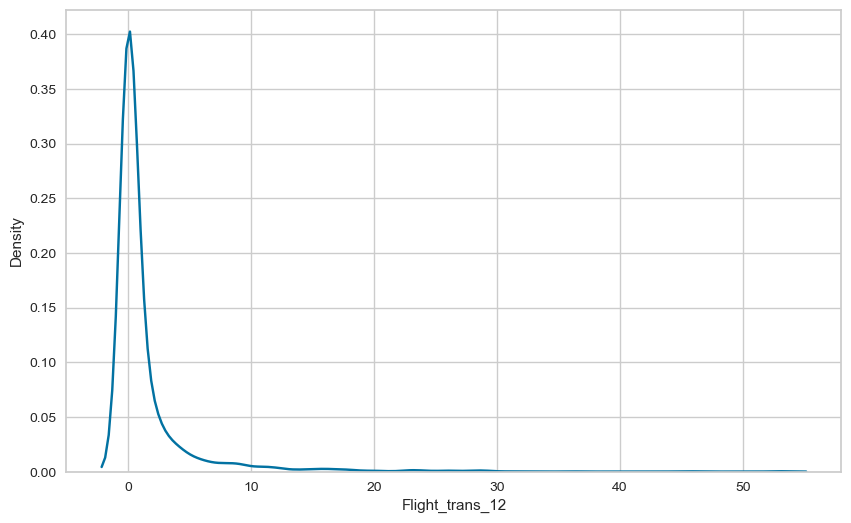

Days_since_enroll


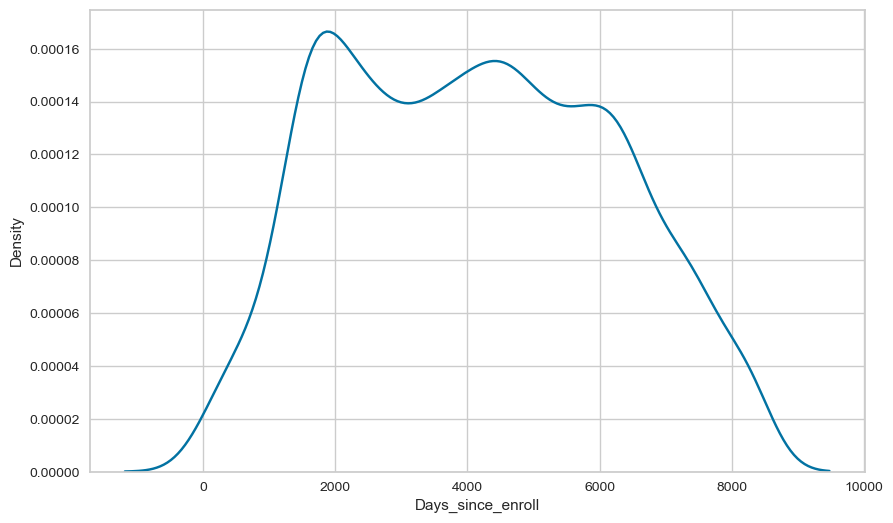

award


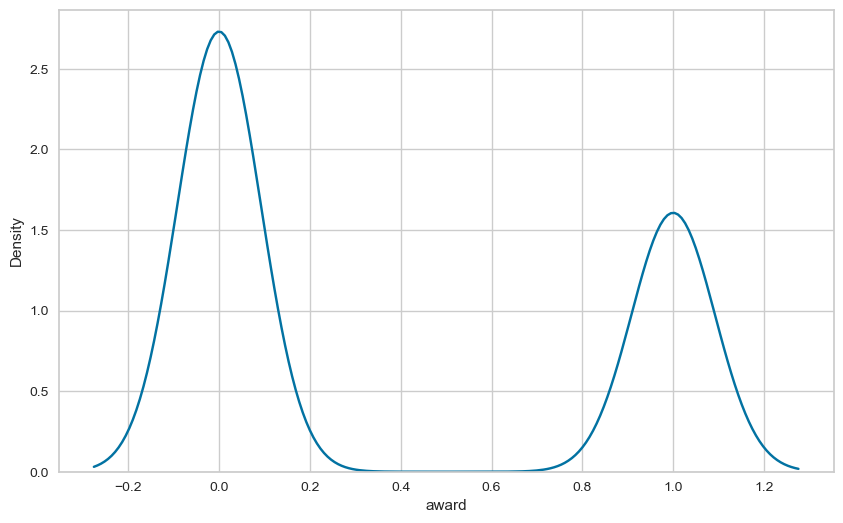

In [12]:
 # Kernel Density for every feature, singled out
for n in data.columns:
    print(n)
    plt.figure(figsize=[10,6])
    sns.kdeplot(data[n])
    plt.show()

<Axes: >

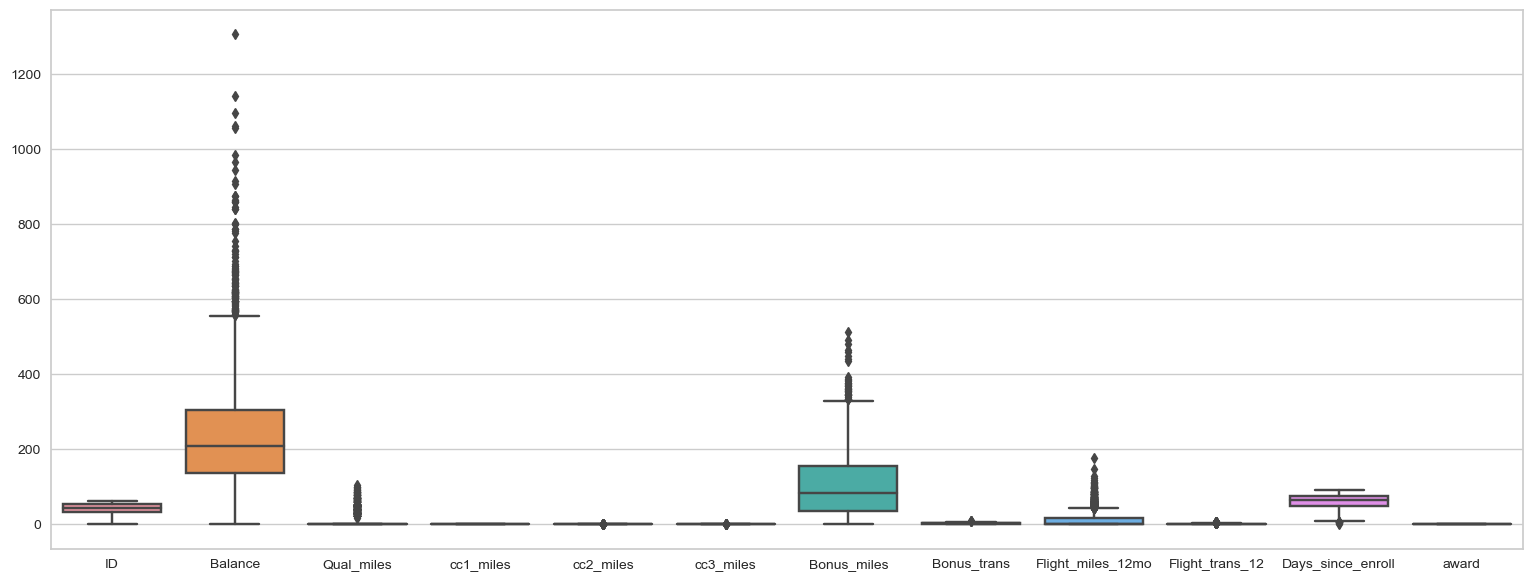

In [13]:
plt.figure(figsize=(19,7))
sns.boxplot(data=np.sqrt(data))

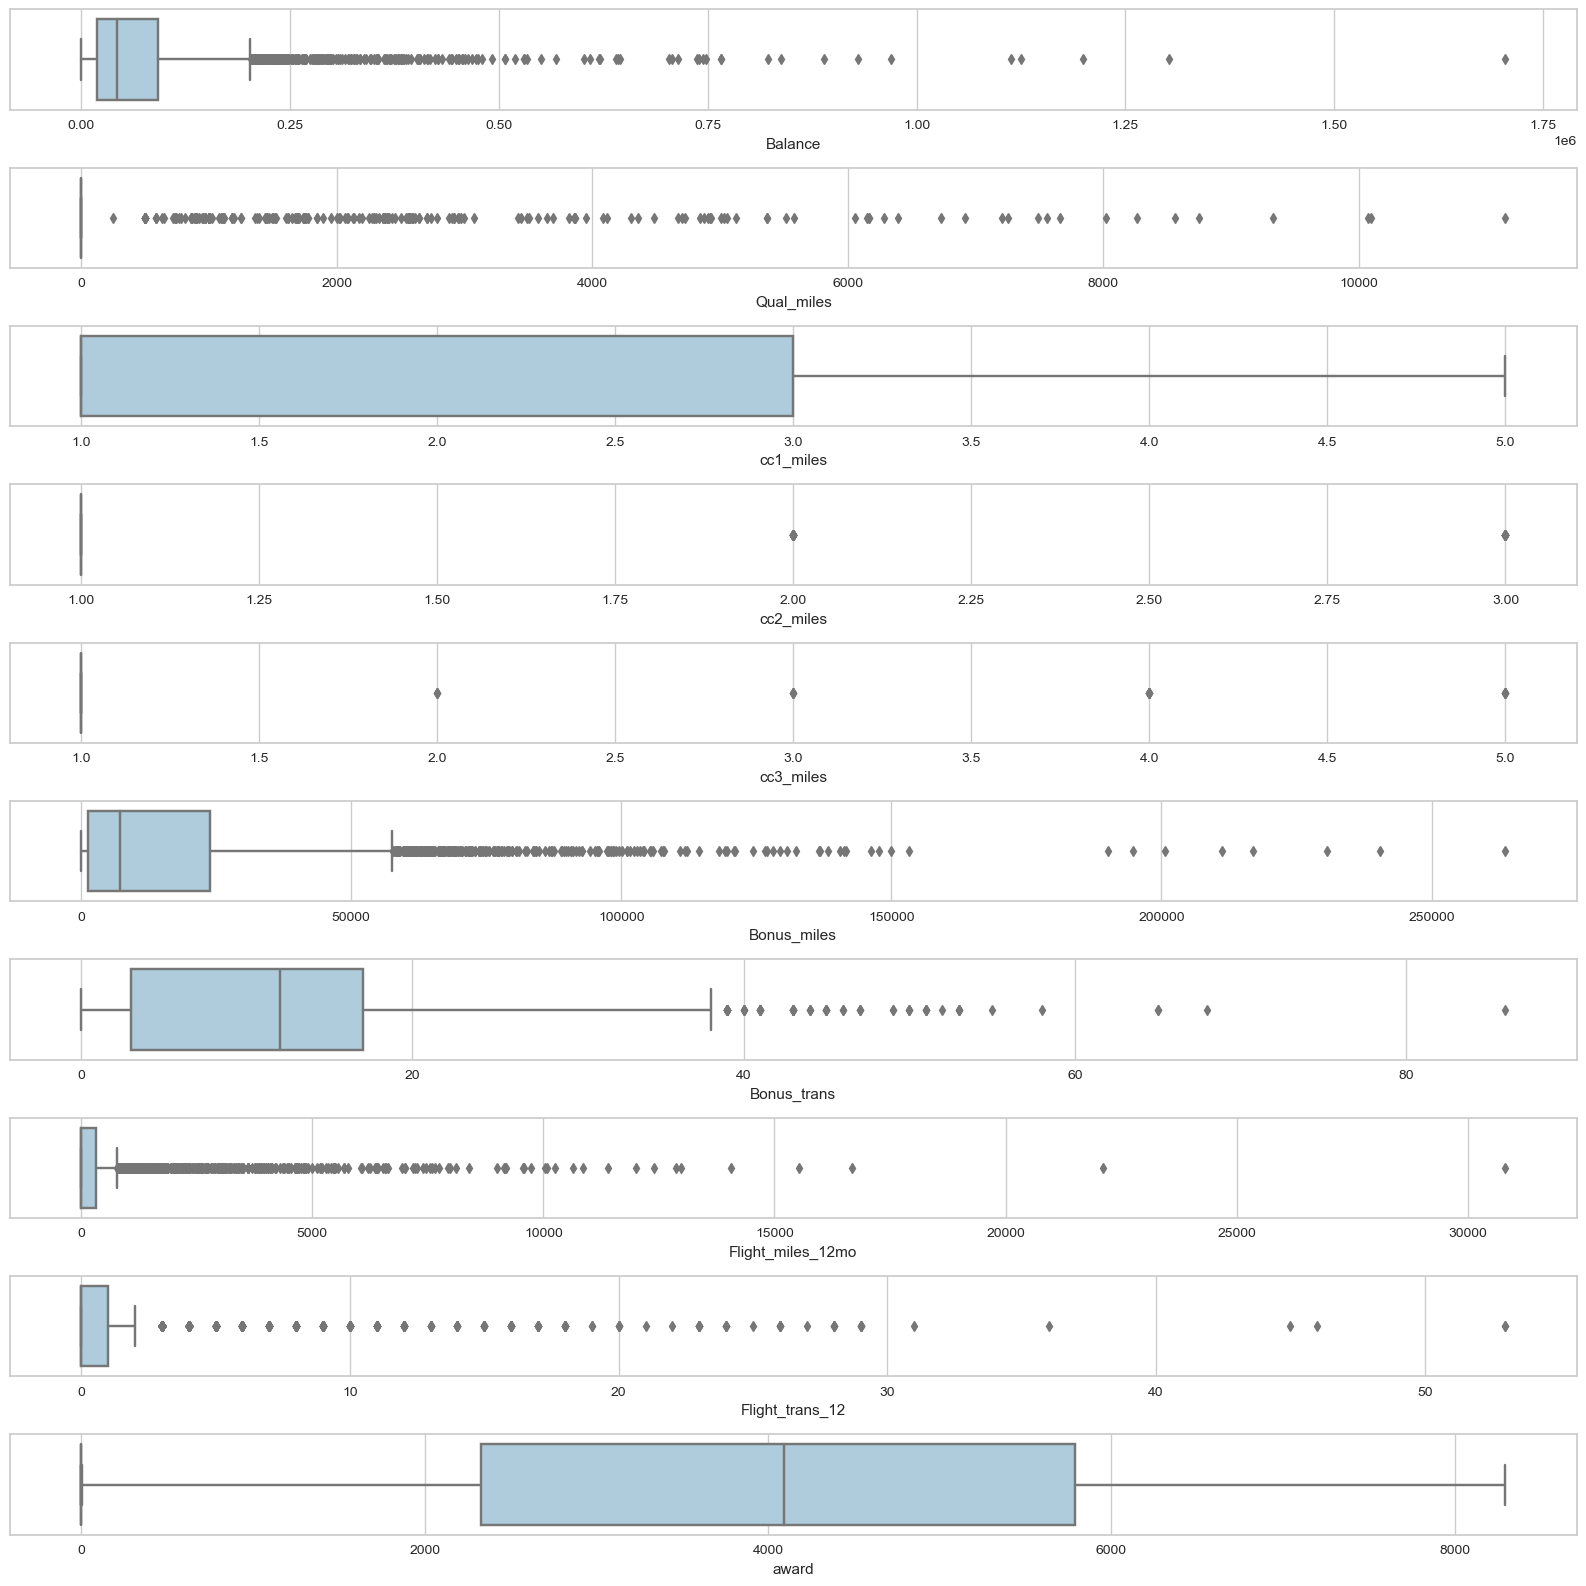

In [14]:
ot=data.copy()
palette="Paired"
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=ot,palette=palette,ax=axes[0])
sns.boxplot(x='Qual_miles',data=ot,palette=palette,ax=axes[1])
sns.boxplot(x='cc1_miles',data=ot,palette=palette,ax=axes[2])
sns.boxplot(x='cc2_miles',data=ot,palette=palette,ax=axes[3])
sns.boxplot(x='cc3_miles',data=ot,palette=palette,ax=axes[4])
sns.boxplot(x='Bonus_miles',data=ot,palette=palette,ax=axes[5])
sns.boxplot(x='Bonus_trans',data=ot,palette=palette,ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette=palette,ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,palette=palette,ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,palette=palette,ax=axes[9])
sns.boxplot(x='award',data=ot,palette=palette,ax=axes[9])
plt.tight_layout(pad=1.0)

In [15]:
awarded_percent=len(data[data.award==1])
non_awarded_percent=len(data[data.award==0])
print("percentage of customers with award : ",(awarded_percent/3998)*100)
print("percentage of customers without award : ",(non_awarded_percent/3998)*100)

percentage of customers with award :  37.04352176088044
percentage of customers without award :  62.98149074537268


<Axes: >

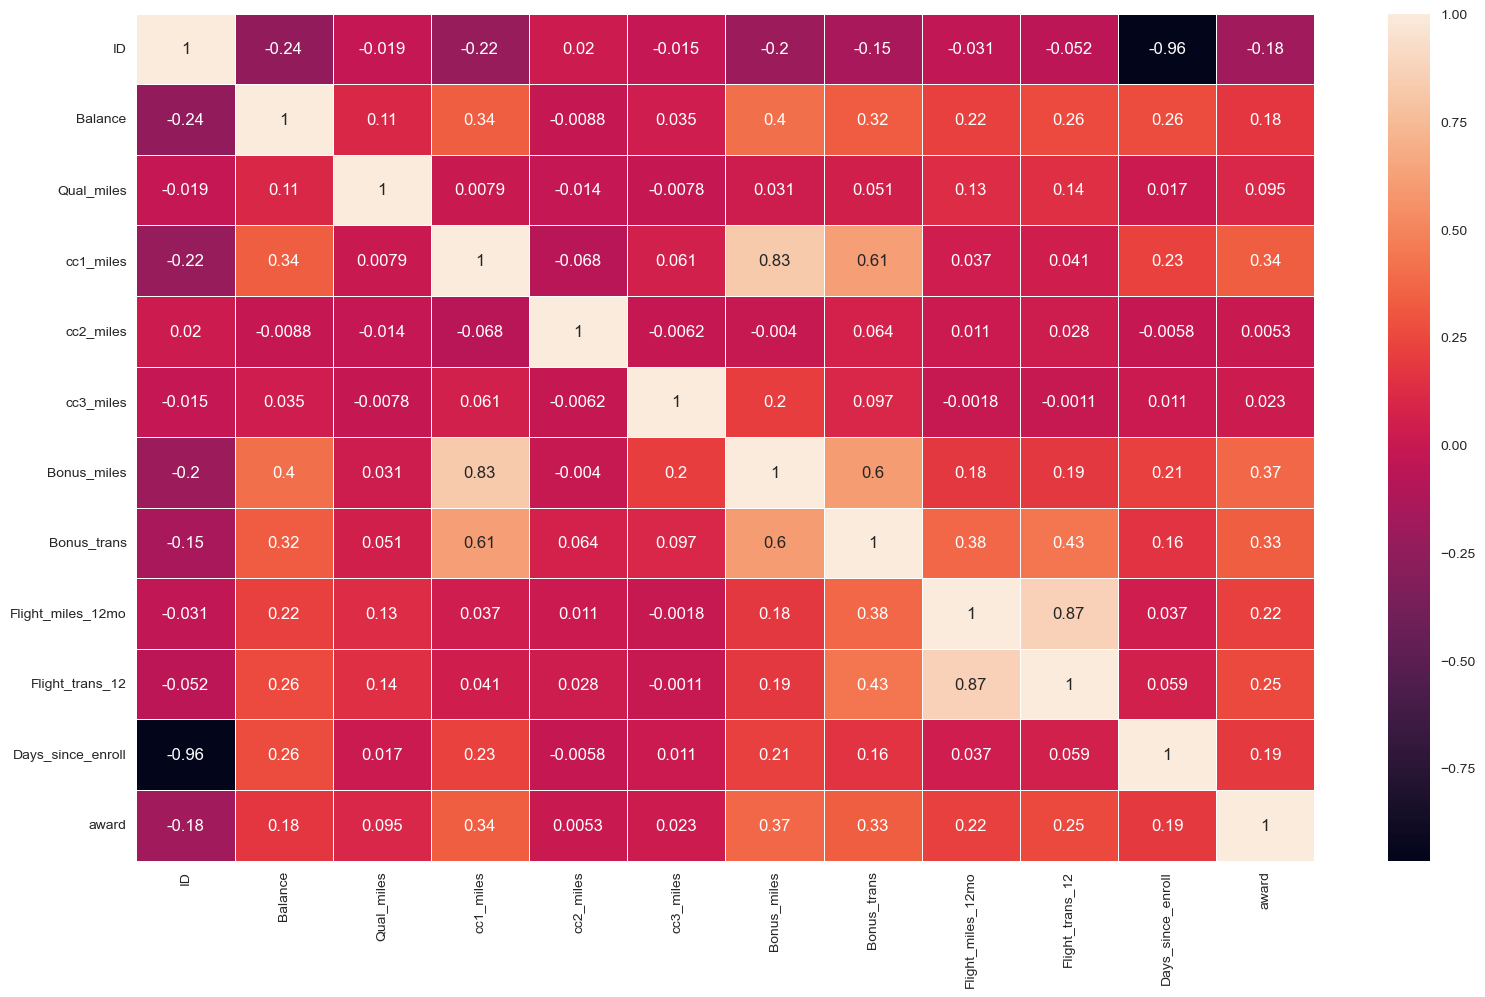

In [16]:
plt.figure(figsize=[19,11])
sns.heatmap(data.corr(),annot=True,linewidths =.5)

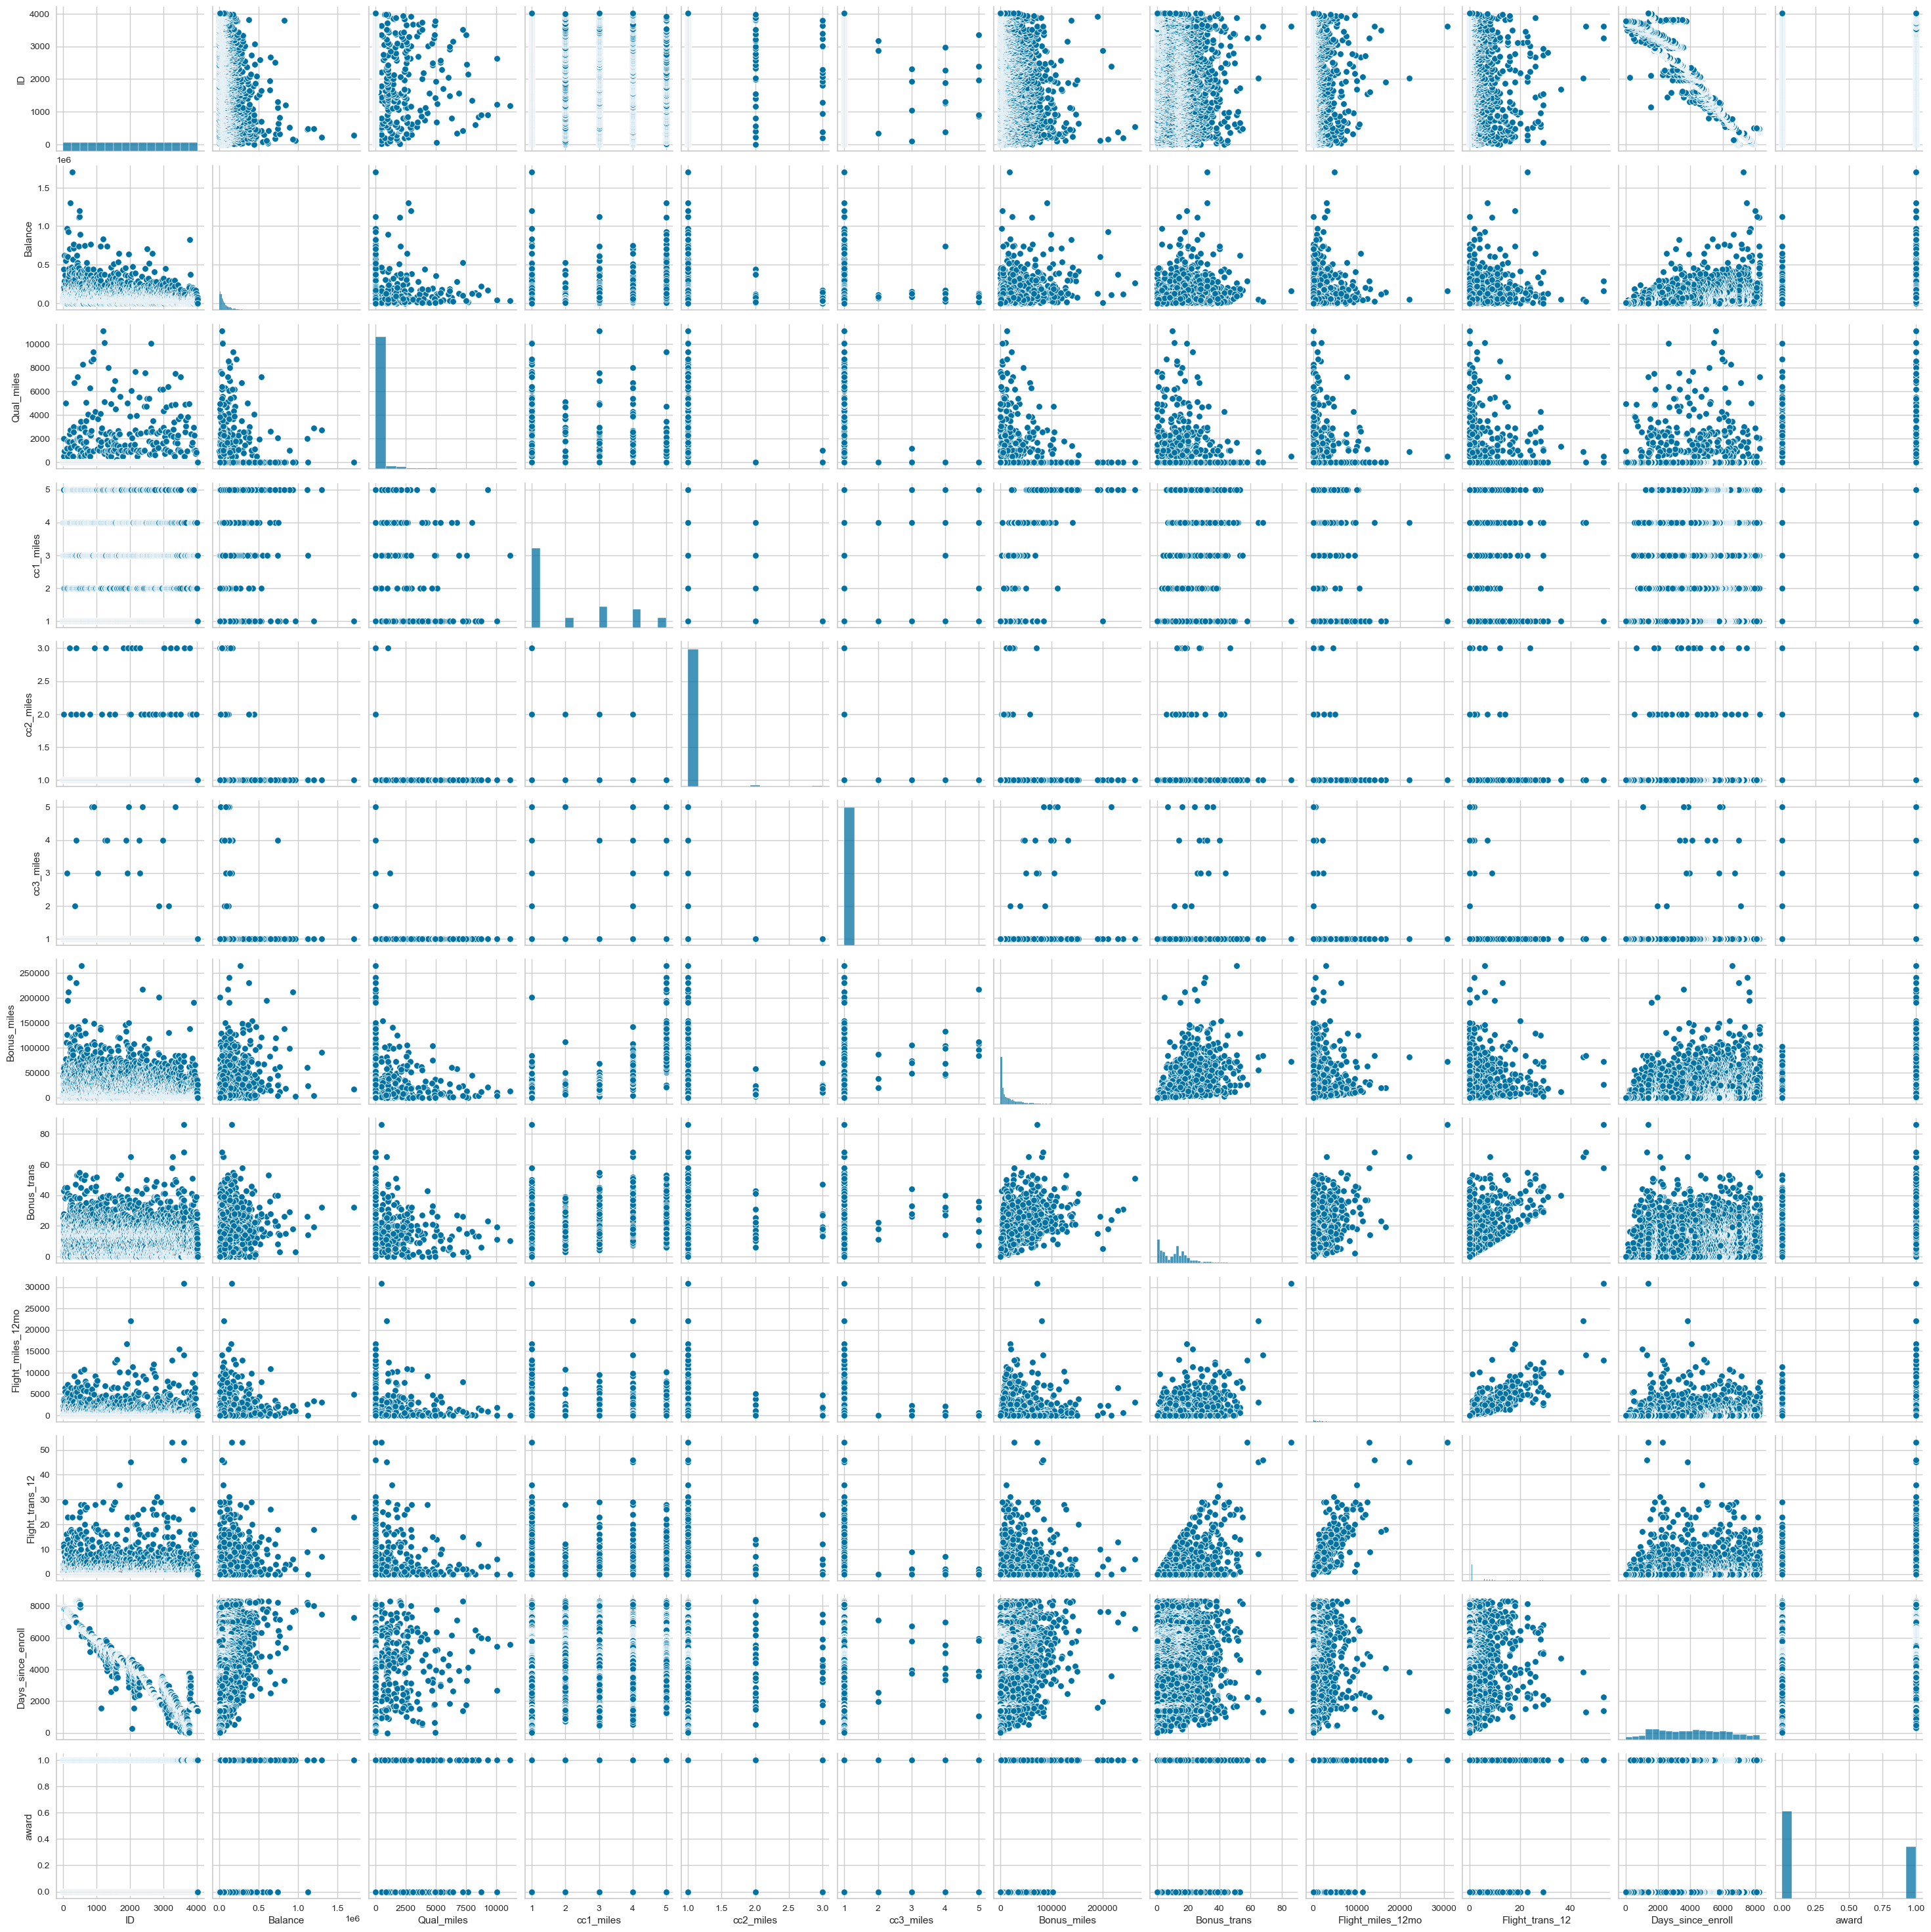

In [ ]:
sns.pairplot(data)

# PREPROCESSING

In [ ]:
standard=StandardScaler()
std_df=standard.fit_transform(data)

In [ ]:
minmax=MinMaxScaler()
mmx_df=minmax.fit_transform(data)

# *KMEANS  CLUSTERING* 

# (KMEANS)Elbow Method and Silhouette Score on Standard Scaler

In [20]:
cluster_range = range(1, 15)
cluster_errors = [KMeans(i, n_init=10).fit(std_df).inertia_ for i in cluster_range]
clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df


num_clusters  cluster_errors
0   1             47988.000000  
1   2             39018.801731  
2   3             34529.313109  
3   4             30616.633075  
4   5             26894.771760  
5   6             23490.745045  
6   7             20922.687581  
7   8             19330.342826  
8   9             17986.213614  
9   10            16769.742523  
10  11            15776.874573  
11  12            14961.373176  
12  13            14182.025903  
13  14            13581.555114

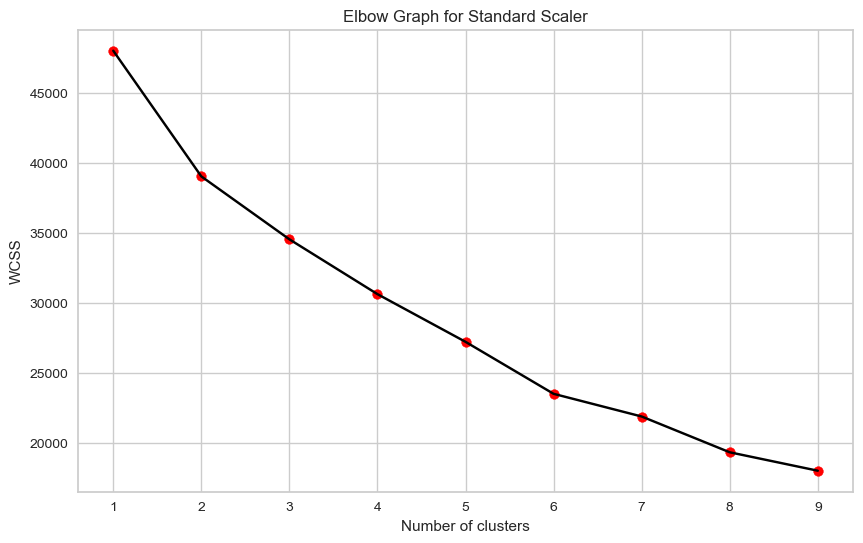

In [21]:
# Use Elbow Graph to find optimum number of clusters for kmeans
wcss = []
cluster_range = range(1, 10)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(cluster_range, wcss, color='black')
ax.scatter(cluster_range, wcss, color='red')
ax.set_title('Elbow Graph for Standard Scaler')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()


In [22]:
n_clusters = range(2, 11) # range of number of clusters to try
clusters_inertia = [] # list to store inertia of clusters
s_scores = [] # list to store silhouette scores

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)
    kmeans.fit(std_df)
    clusters_inertia.append(kmeans.inertia_) # append inertia to list for elbow method
    silhouette_avg = silhouette_score(std_df, kmeans.labels_)
    s_scores.append(silhouette_avg) # append silhouette score to list for silhouette method


In [23]:
print(kmeans.labels_)

[4 4 4 ... 2 0 0]


In [24]:
print(kmeans.cluster_centers_)

[[ 1.03676103 -0.42176093 -0.1377024  -0.7252472  -0.09824189 -0.06276658
  -0.59276624 -0.64654022 -0.20610456 -0.22897395 -1.03393966 -0.60941898]
 [-0.90502515  0.39525235 -0.08381412  1.55632856 -0.09824189 -0.06276658
   1.34755679  0.84933589 -0.04445327 -0.04567437  0.9014295   0.72302751]
 [ 0.68164288  0.06013084 -0.13067158  0.93201862 -0.09824189 -0.04588842
   0.47457683  0.68413008 -0.15705531 -0.17625614 -0.65604174  0.13032988]
 [-0.40837355 -0.10331882 -0.04253826 -0.45903755 -0.09824189 -0.06276658
  -0.35610034 -0.23549024  0.02330717  0.04335965  0.39306423  1.30391816]
 [-0.77410512 -0.19053326 -0.14377748 -0.50719993 -0.09824189 -0.05734018
  -0.50149841 -0.41789864 -0.20491756 -0.22251504  0.75260794 -0.7669193 ]
 [-0.08318957  0.57217673  0.42722011  0.0316528  -0.09824189 -0.06276658
   0.56257621  1.91594791  4.54127816  4.66376752  0.09459511  0.85559252]
 [ 0.21932485 -0.04688966 -0.1562356  -0.66822727  9.03825361 -0.06276658
  -0.10166533  0.61785114  0.087

In [25]:
std_df

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

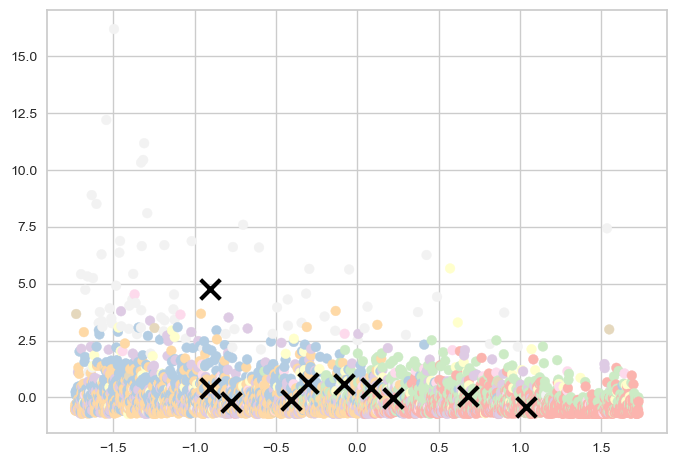

In [26]:


# scatter plot of data points colored by cluster
plt.scatter(std_df[:, 0],std_df[:, 1], c=kmeans.labels_, cmap='Pastel1')

# plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='black')


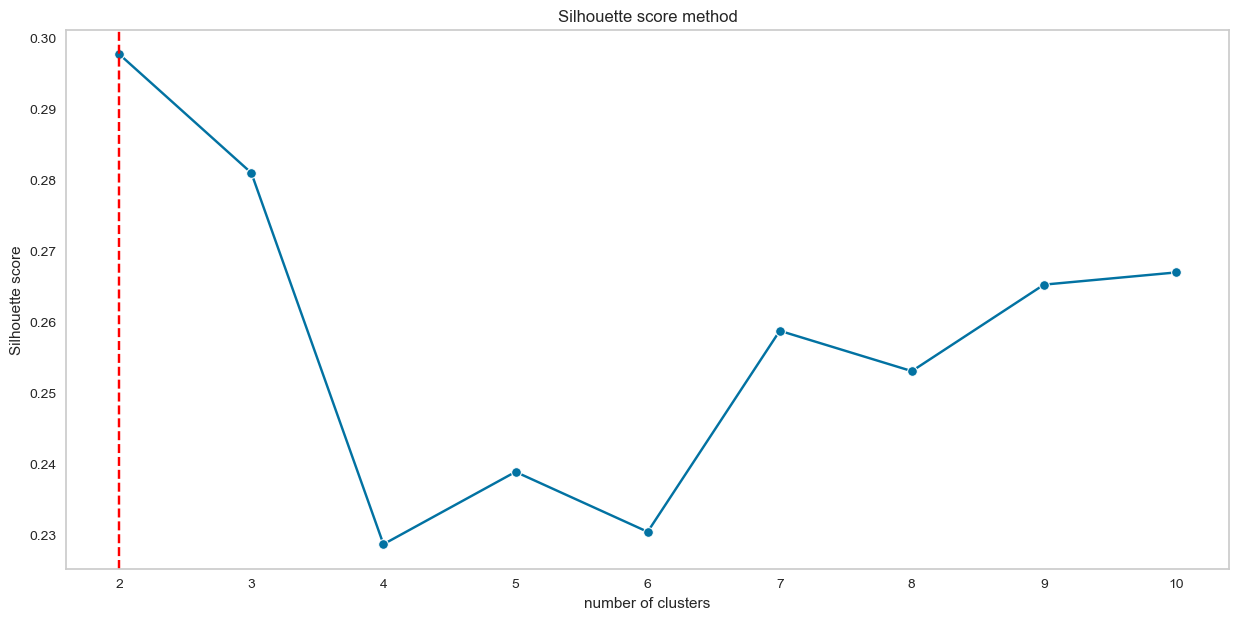

In [27]:
fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()


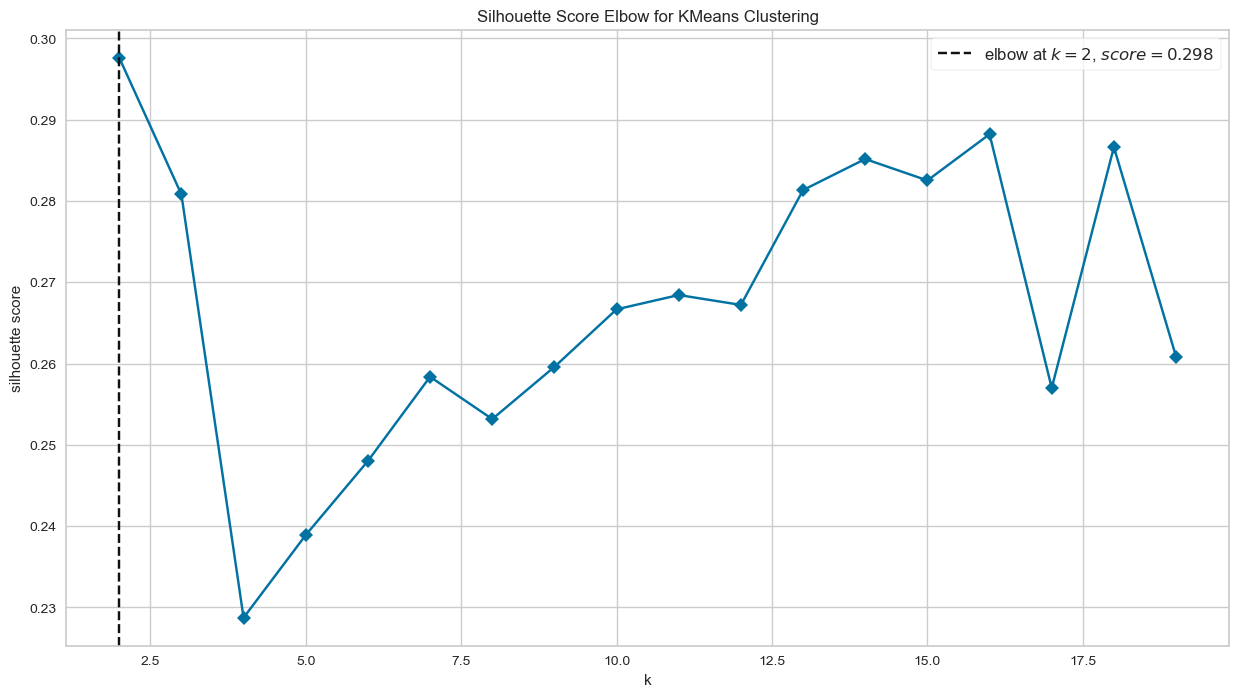

In [28]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')
visualizer= KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

plt.figure(figsize=[15,8])
visualizer.fit(std_df)    
visualizer.poof()
plt.show()

In [29]:
clust_list = [2,3,4,5,6,7,8,9]
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.2979332294964896
For n_clusters = 3 The average silhouette_score is : 0.28132087151477925
For n_clusters = 4 The average silhouette_score is : 0.22872180856339985
For n_clusters = 5 The average silhouette_score is : 0.23890516538353704
For n_clusters = 6 The average silhouette_score is : 0.24755064720991268
For n_clusters = 7 The average silhouette_score is : 0.24211334683095515
For n_clusters = 8 The average silhouette_score is : 0.2530376128959621
For n_clusters = 9 The average silhouette_score is : 0.259638325862941


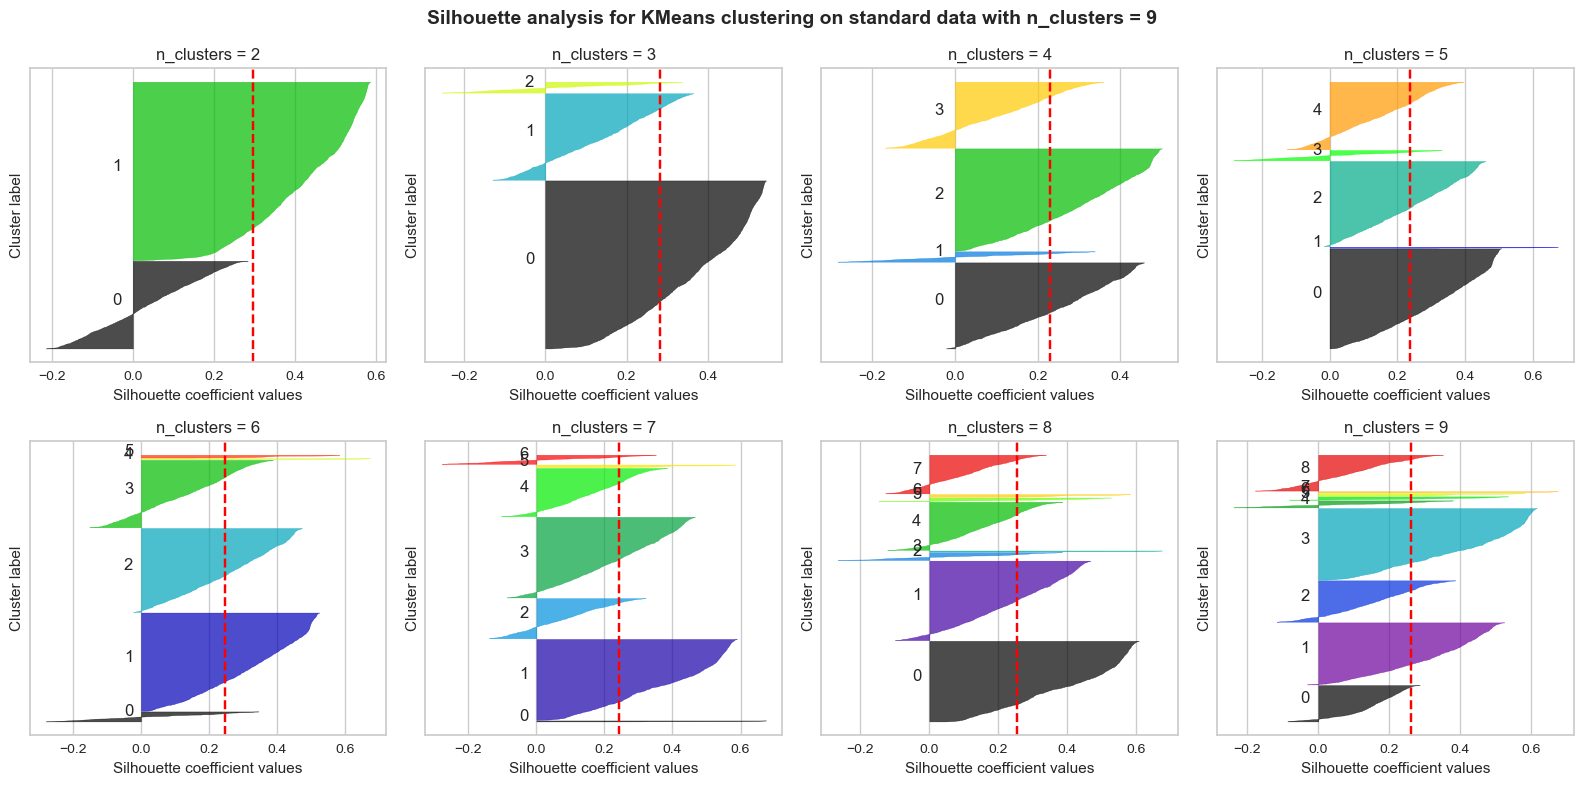

In [30]:

range_n_clusters = range(2, 10)
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()


for i, n_clusters in enumerate(range_n_clusters):
    # Fit the model and get the cluster labels
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(std_df)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(std_df, cluster_labels)
    
    # Calculate the silhouette plot
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)
    y_lower = 10
    plt.suptitle(("Silhouette analysis for KMeans clustering on standard data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    for j in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == j]
        ith_cluster_silhouette_values.sort()
        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        axs[i].fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
        axs[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    # Plot the silhouette score
    axs[i].axvline(x=silhouette_avg, color="red", linestyle="--")
    axs[i].set_title("n_clusters = {}".format(n_clusters))
    axs[i].set_xlabel("Silhouette coefficient values")
    axs[i].set_ylabel("Cluster label")
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()


In [31]:
data['Kmeans_label'] = model.labels_

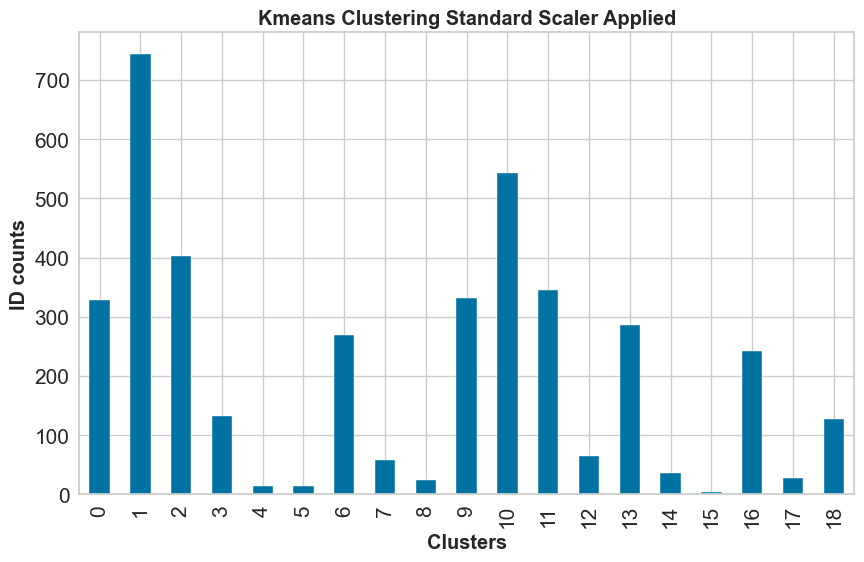

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['Kmeans_label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# (KMEANS) Elbow Method and Silhouette Score on MinMaxScaler 

In [33]:
cluster_range = range(1, 15)
cluster_errors = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(mmx_df)
    cluster_errors.append(kmeans.inertia_)
    
clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df


num_clusters  cluster_errors
0   1             2164.126598   
1   2             1146.459517   
2   3             865.261590    
3   4             673.471219    
4   5             536.206841    
5   6             452.228431    
6   7             397.945659    
7   8             346.226852    
8   9             308.516958    
9   10            289.449334    
10  11            277.200478    
11  12            265.946497    
12  13            253.009278    
13  14            242.430656

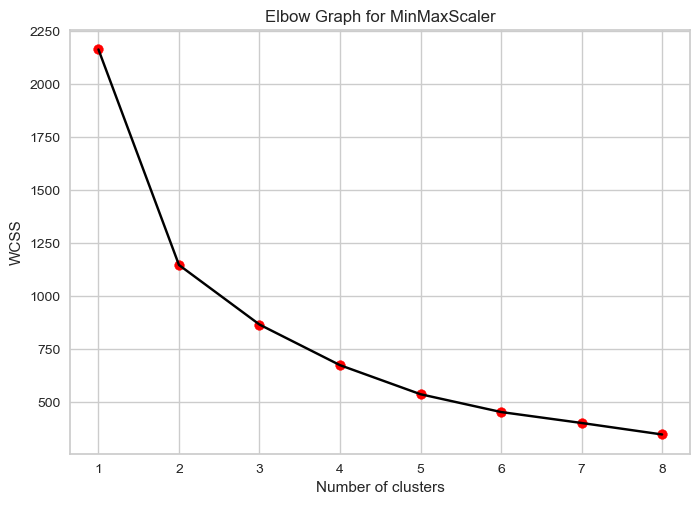

In [34]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(mmx_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

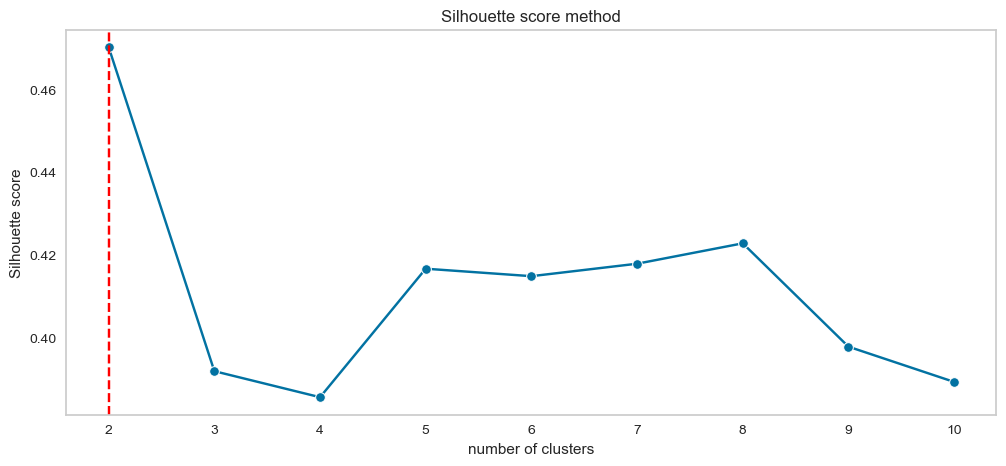

In [35]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(mmx_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(mmx_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

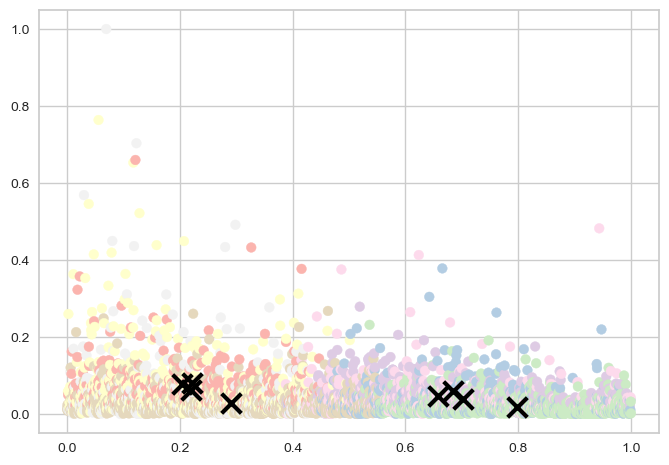

In [36]:
plt.scatter(mmx_df[:, 0],mmx_df[:, 1], c=kmeans.labels_, cmap='Pastel1')

# plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='black')


Elbow Plot for MinMaxScaler data


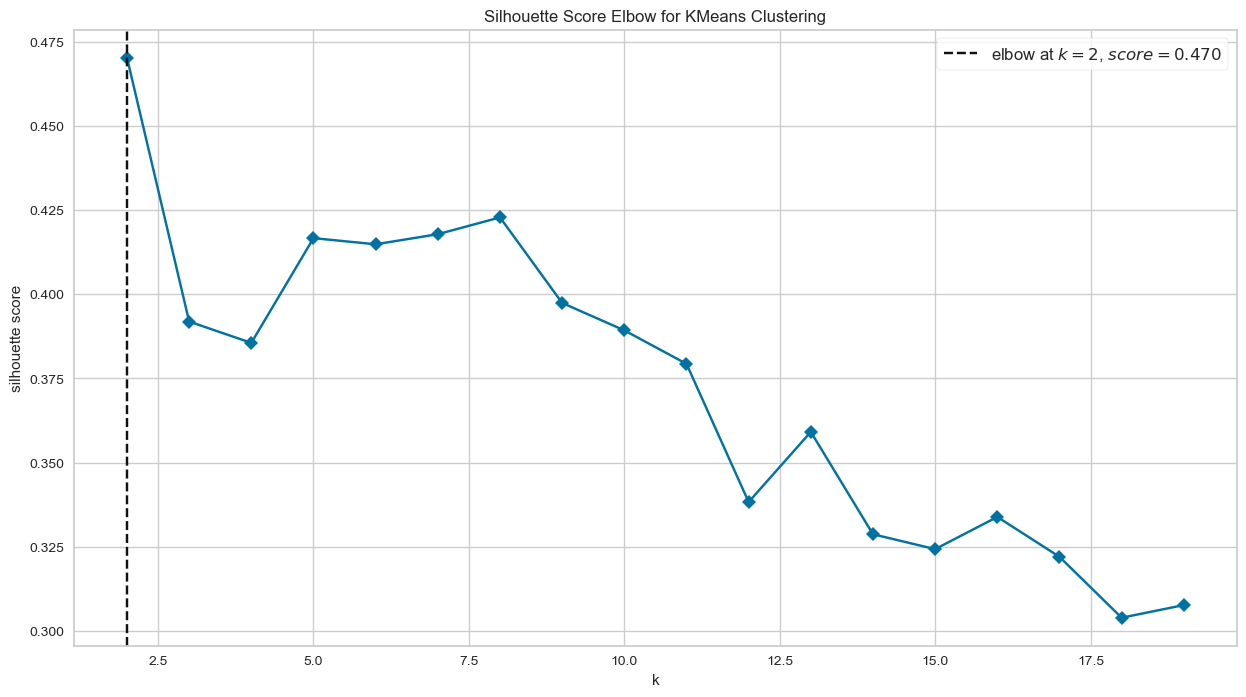

In [37]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')


visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

print('Elbow Plot for MinMaxScaler data')
plt.figure(figsize=[15,8])
visualizer.fit(mmx_df)    
visualizer.poof()
plt.show()

In [38]:
clust_list = [2,3,4,5,6,7,8,9]



for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(mmx_df)
    sil_score1= sil(mmx_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4701970394742716
For n_clusters = 3 The average silhouette_score is : 0.39192300832091903
For n_clusters = 4 The average silhouette_score is : 0.3855615917300375
For n_clusters = 5 The average silhouette_score is : 0.4166386993706997
For n_clusters = 6 The average silhouette_score is : 0.41481379811626945
For n_clusters = 7 The average silhouette_score is : 0.4178110309614972
For n_clusters = 8 The average silhouette_score is : 0.42277649570296266
For n_clusters = 9 The average silhouette_score is : 0.39778586316224257


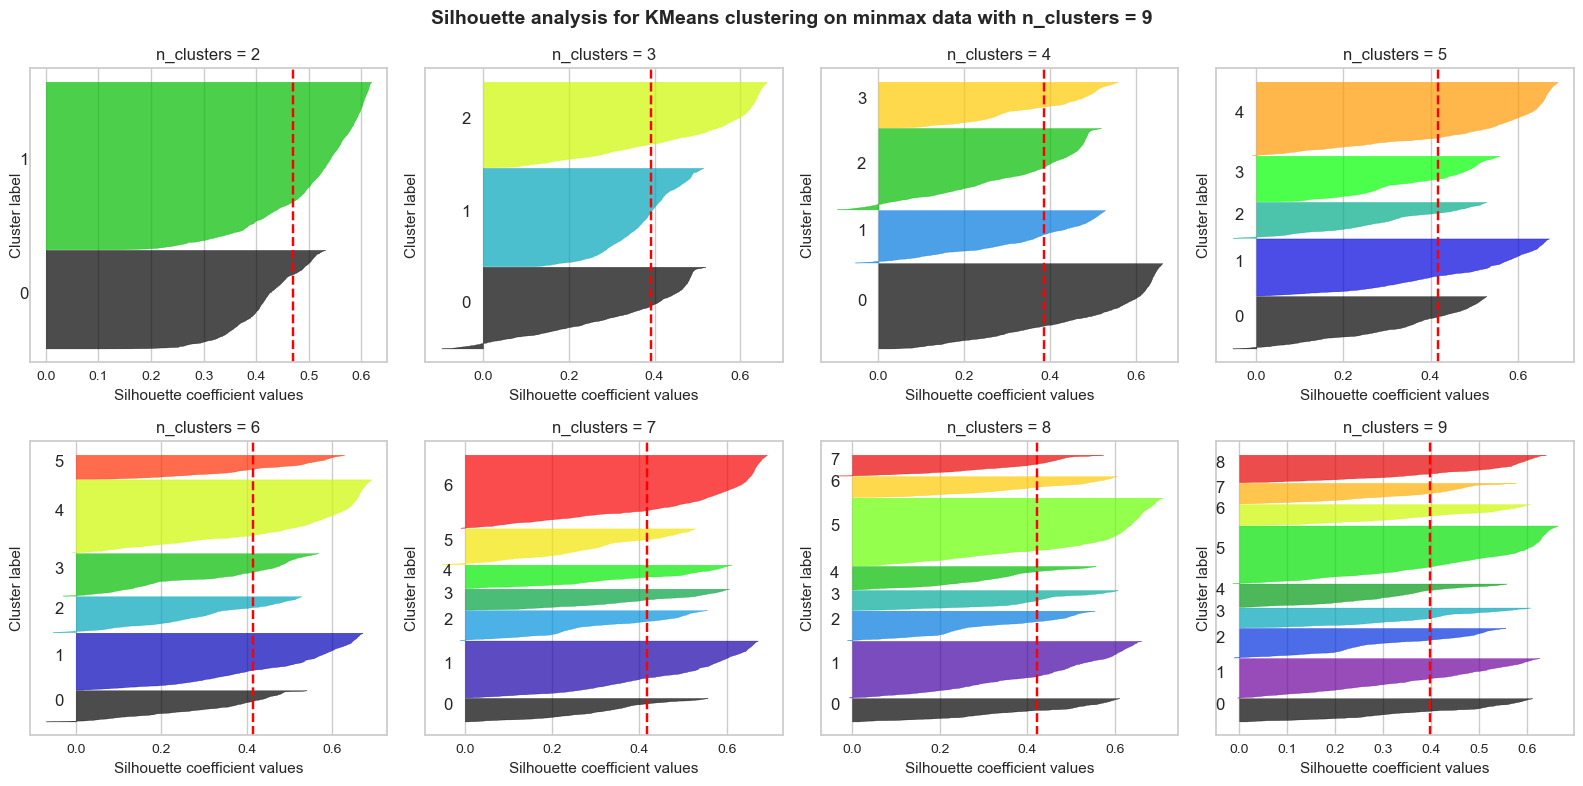

In [39]:

range_n_clusters = range(2, 10)
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()


for i, n_clusters in enumerate(range_n_clusters):
    # Fit the model and get the cluster labels
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(mmx_df)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(mmx_df, cluster_labels)
    
    # Calculate the silhouette plot
    sample_silhouette_values = silhouette_samples(mmx_df, cluster_labels)
    y_lower = 10
    plt.suptitle(("Silhouette analysis for KMeans clustering on minmax data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    for j in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == j]
        ith_cluster_silhouette_values.sort()
        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        axs[i].fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
        axs[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    # Plot the silhouette score
    axs[i].axvline(x=silhouette_avg, color="red", linestyle="--")
    axs[i].set_title("n_clusters = {}".format(n_clusters))
    axs[i].set_xlabel("Silhouette coefficient values")
    axs[i].set_ylabel("Cluster label")
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()


# HIERACHICAL CLUSTERING

# DENDROGRAM FOR MINMAX SCALED DATA

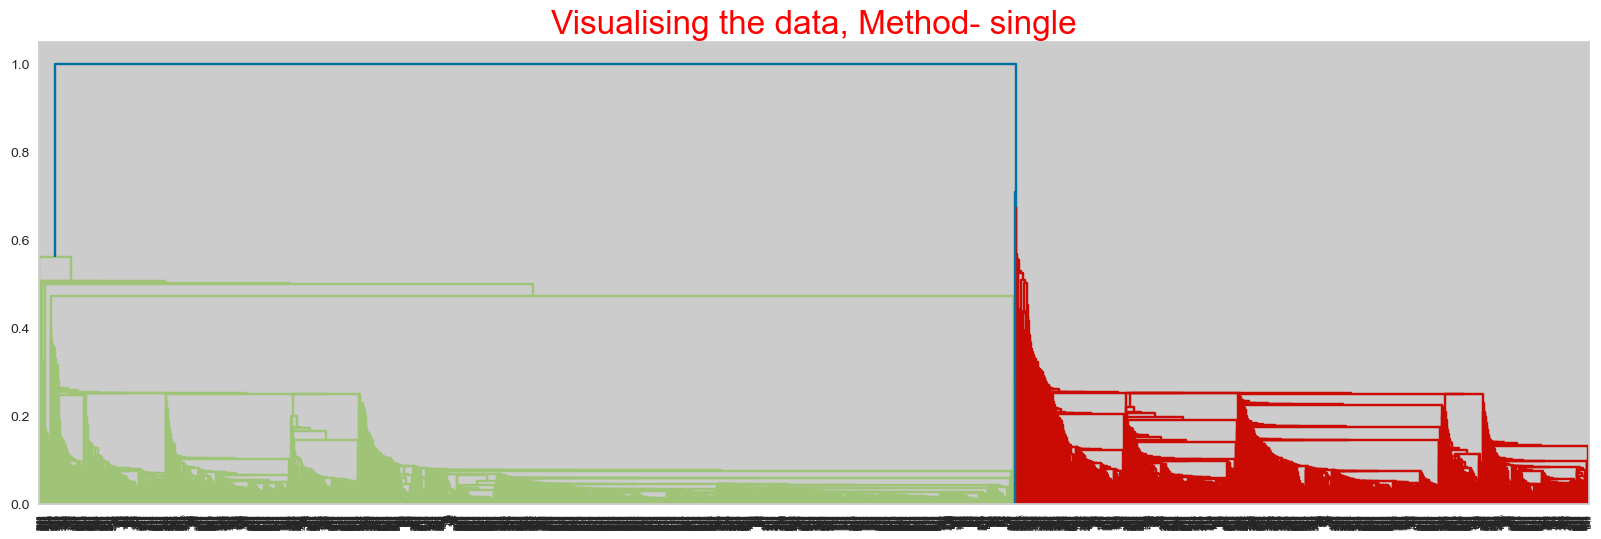

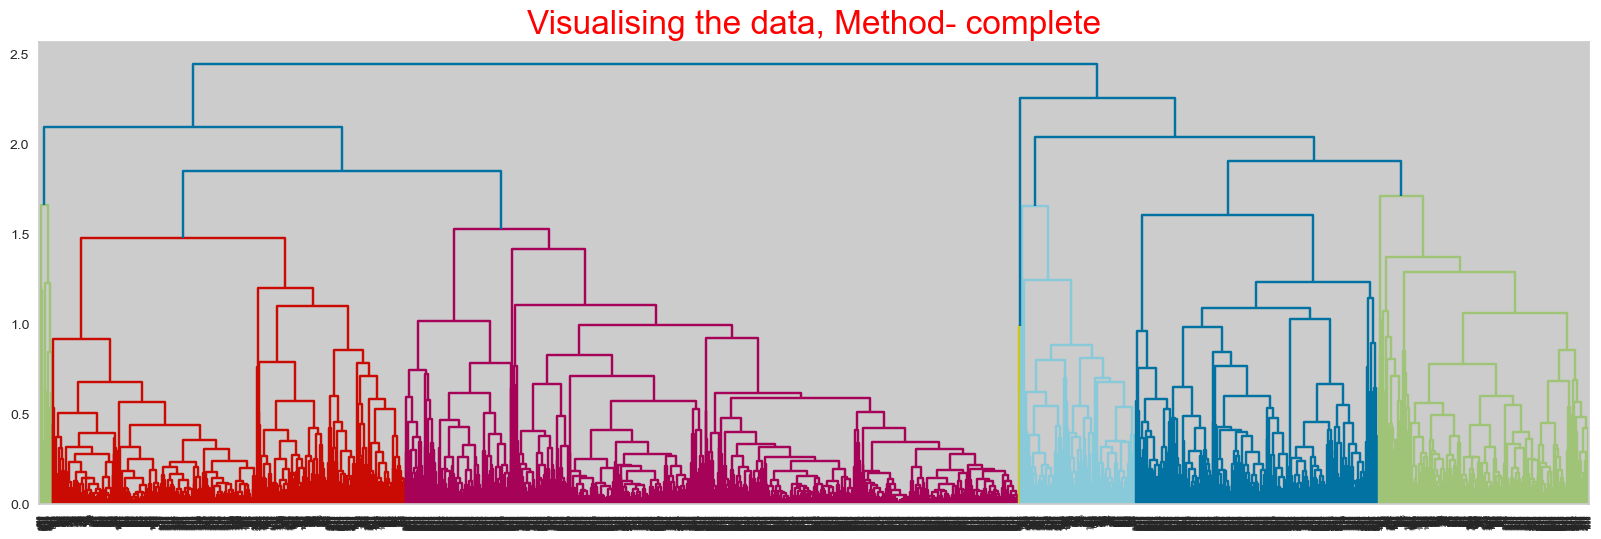

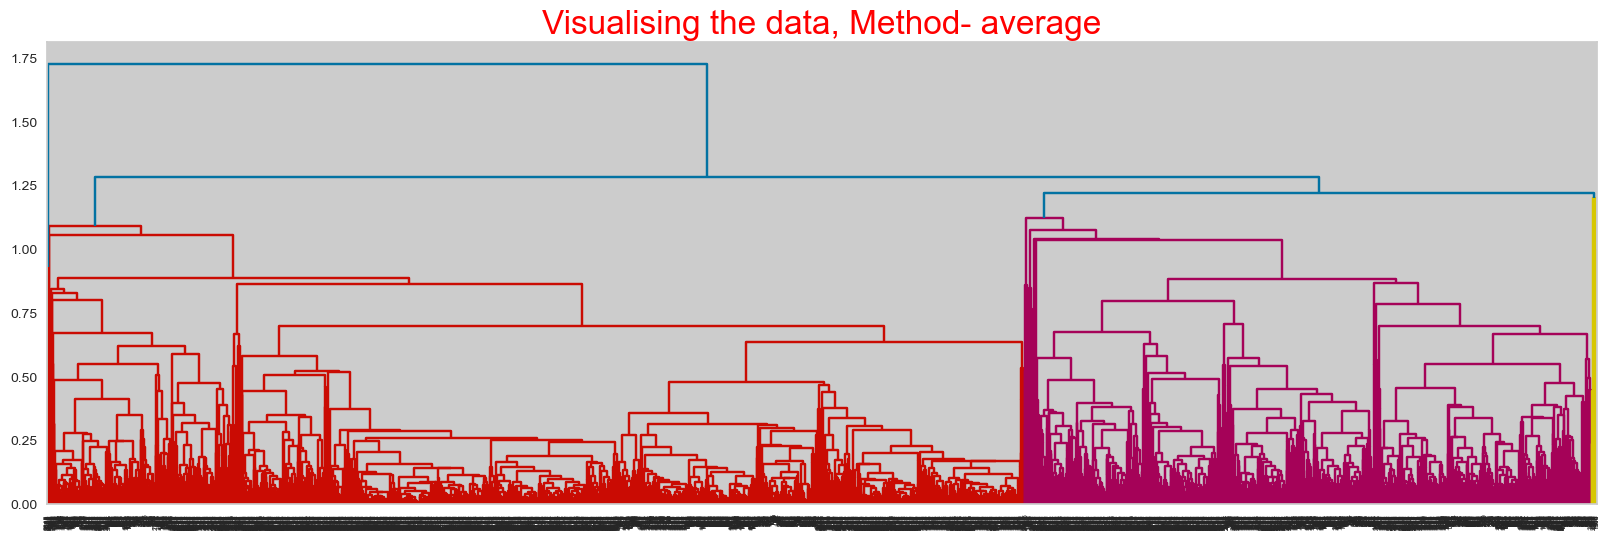

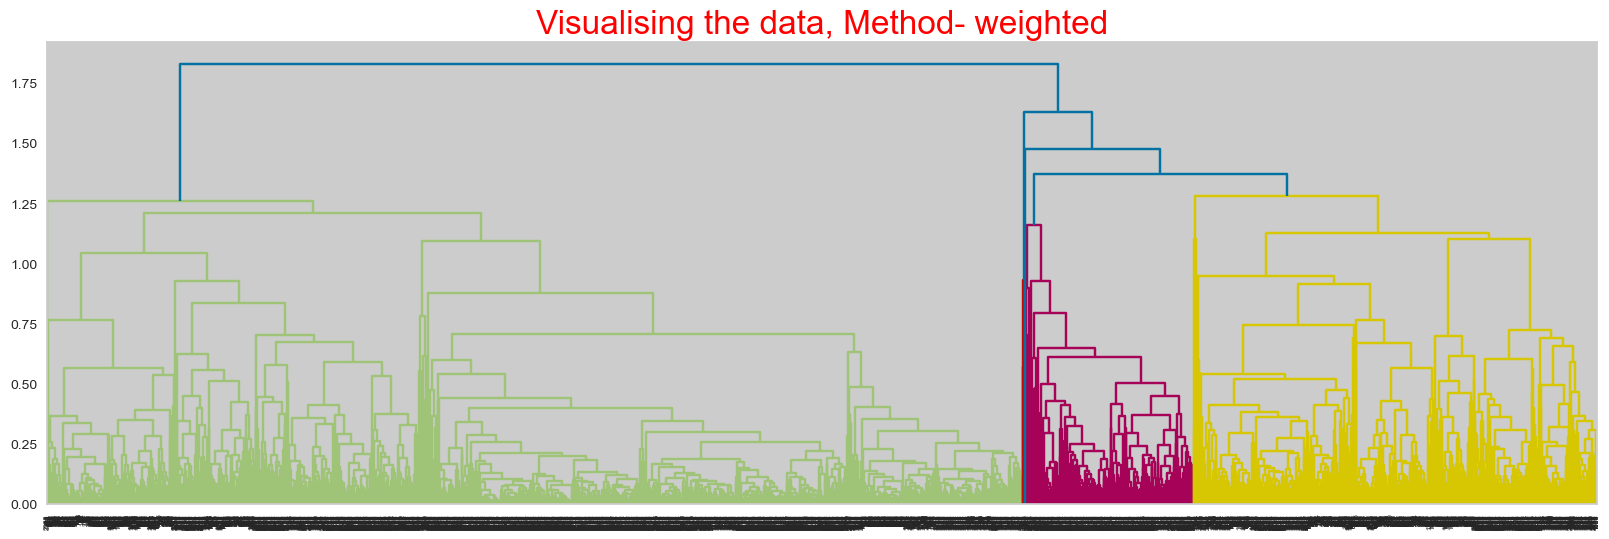

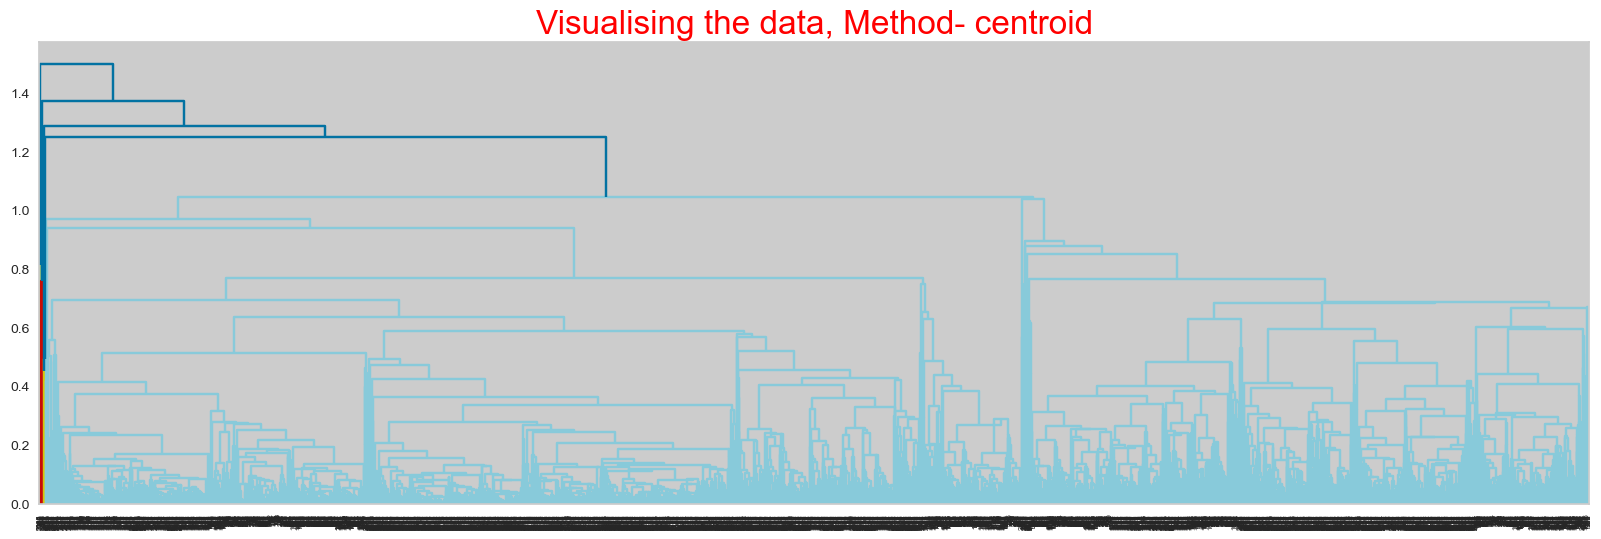

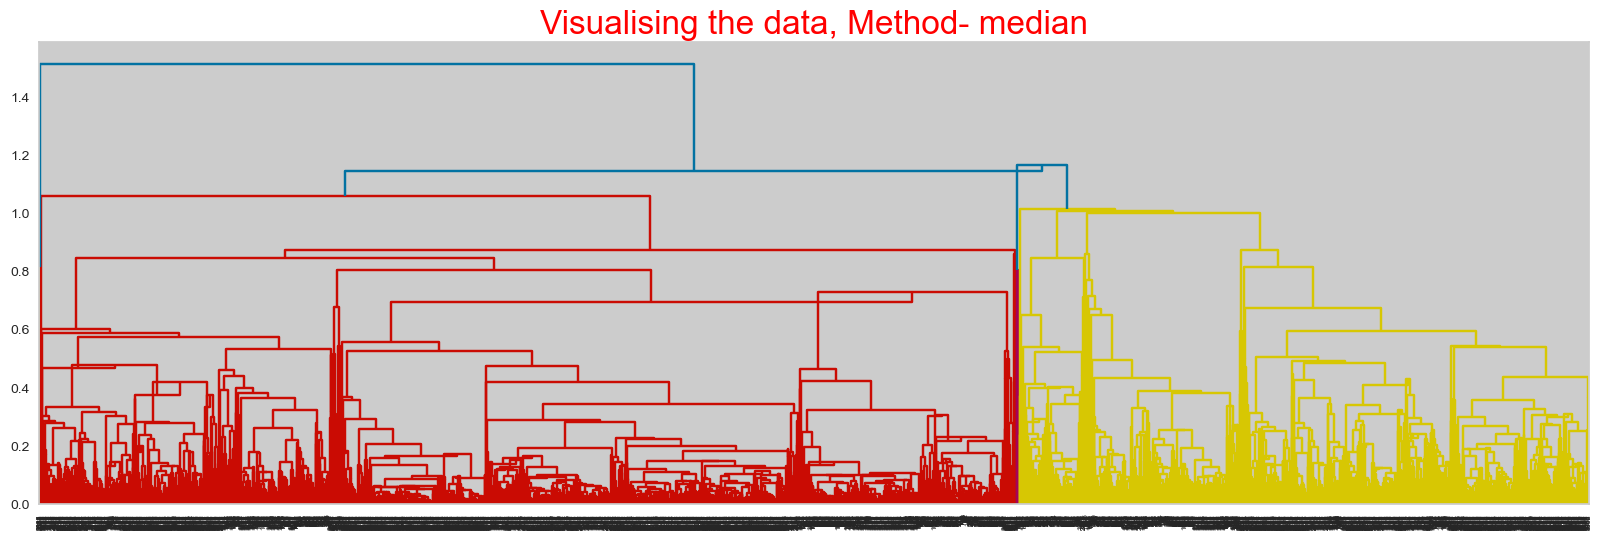

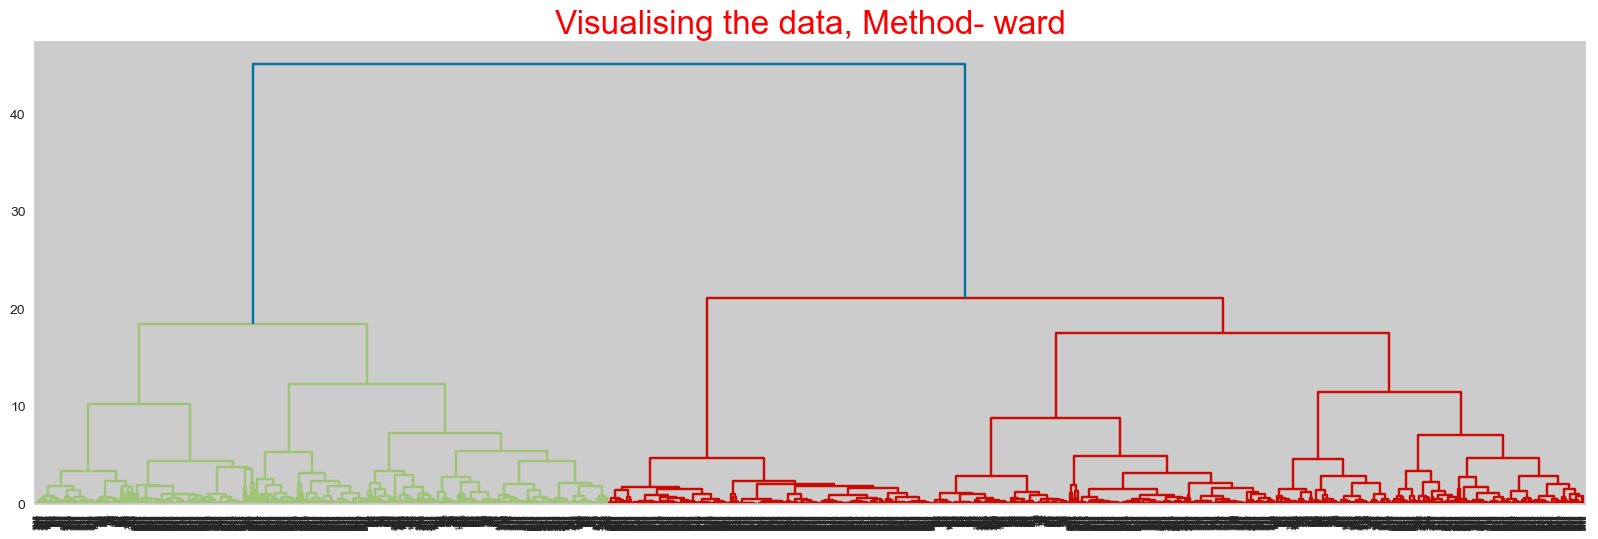

In [40]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'red'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(mmx_df, method = methods,optimal_ordering=False))
    

In [41]:
#silhoutte score for minmax scaled data
n_clusters = [2,3,4,5,6,7,8]  

for i in n_clusters:
    for b in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=i,linkage=b) 
        hie_labels1 = hie_cluster1.fit_predict(mmx_df)
        silhouette_score1 = sil(mmx_df, hie_labels1)
        print("For n_clusters =", i,"The average silhouette_score with linkage-",b, ':',silhouette_score1)
    print()
#2 clusters is the optimal number of clusters

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4701970394742716
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.46765873557390897
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4356499222984323
For n_clusters = 2 The average silhouette_score with linkage- single : 0.4701970394742716

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3434542103874939
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.4658447823503042
For n_clusters = 3 The average silhouette_score with linkage- average : 0.46834199629175055
For n_clusters = 3 The average silhouette_score with linkage- single : 0.4694358885826447

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.32621110074848614
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4121977176126769
For n_clusters = 4 The average silhouette_score with linkage- average : 0.43839106911894876
F

# DENDROGRAM  FOR STANADARD SCALED DATA

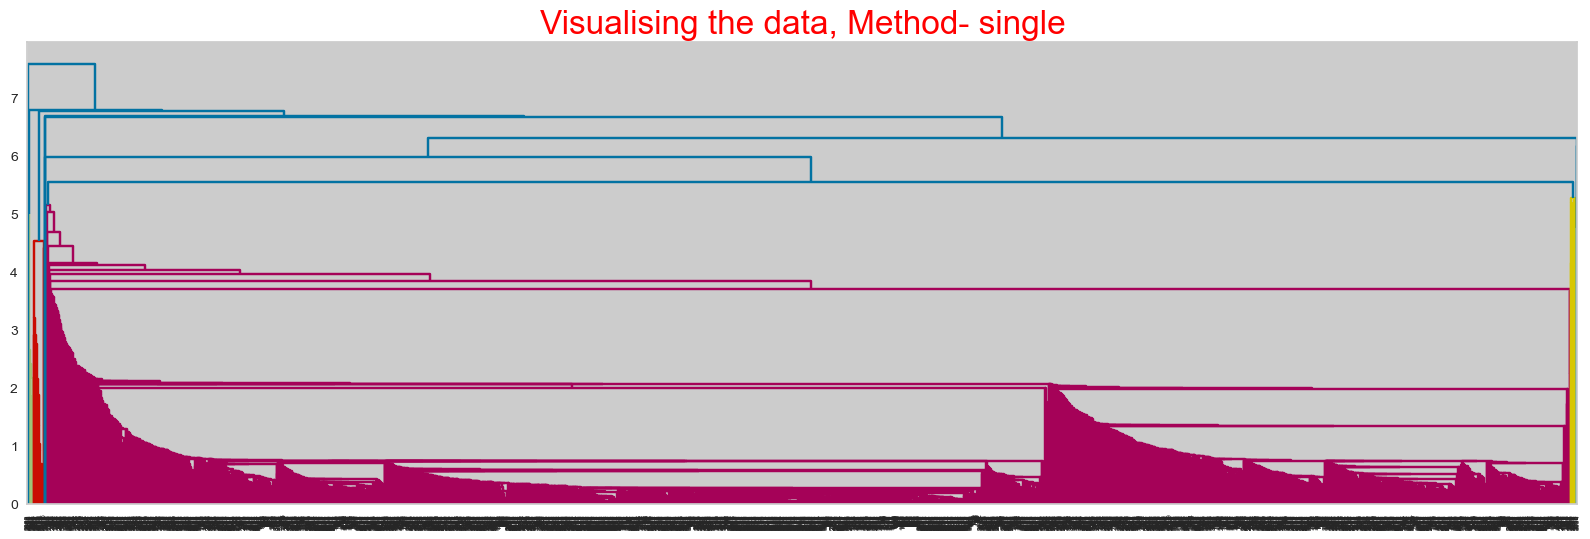

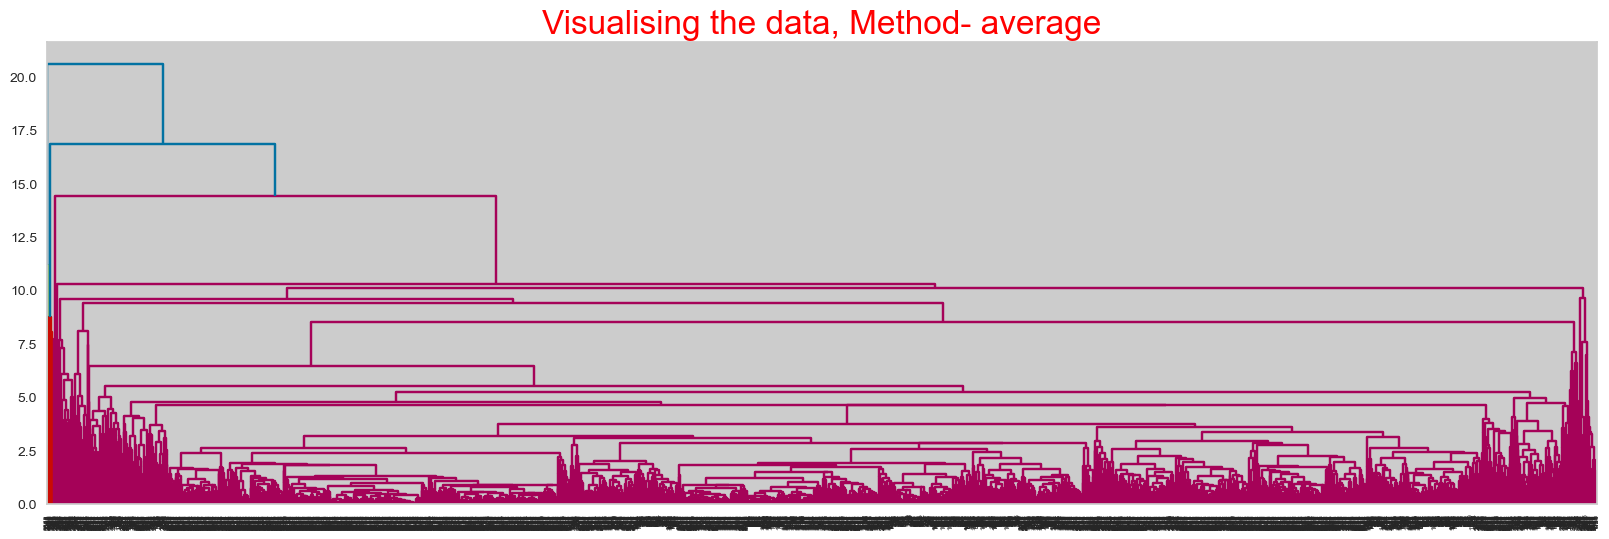

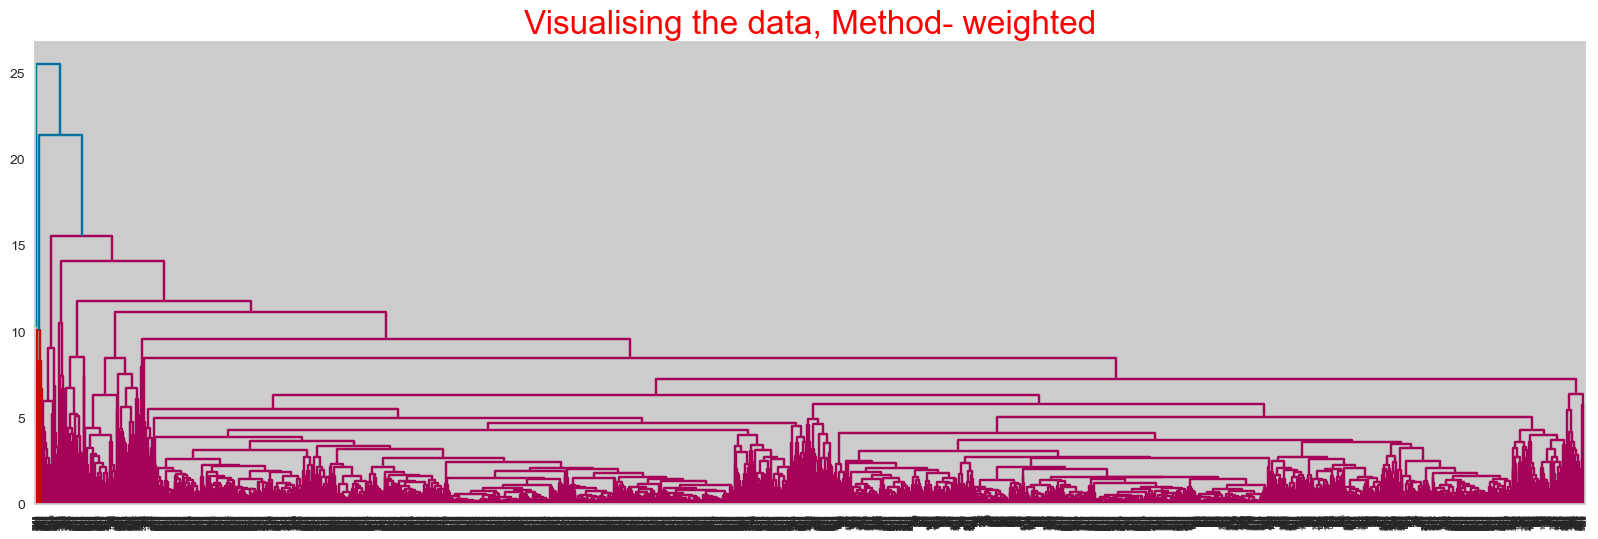

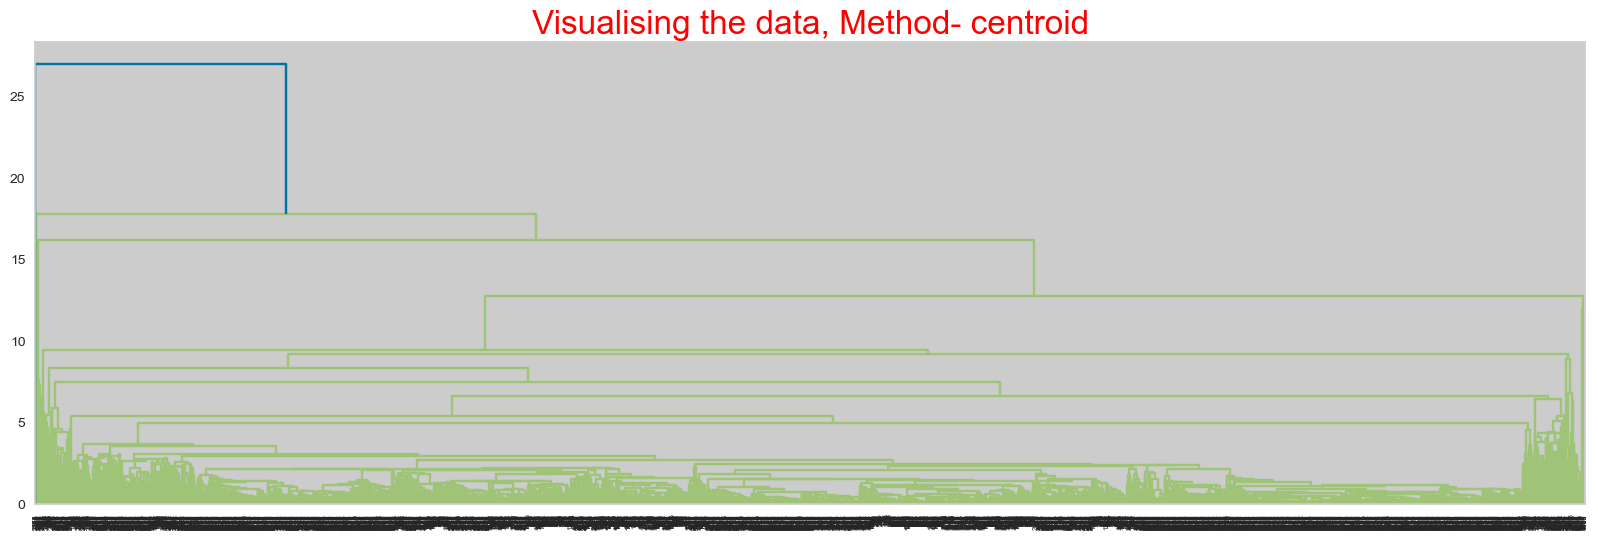

In [42]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'red'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(std_df, method = methods,optimal_ordering=False))
    

In [43]:
#silhoutte score for standard  scaled data
n_clusters = [2,3,4,5,6,7,8,9,10]  

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.19528832524711162
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.7147570737481664
For n_clusters = 2 The average silhouette_score with linkage- average : 0.7986913036411657
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8467289842517026

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.20526614352218822
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7192161842959359
For n_clusters = 3 The average silhouette_score with linkage- average : 0.760749640995539
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7172162983311359

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.21135914614865942
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6276977845234434
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7192609312303987
For

# *PCA* 

# application of PCA in standard data

In [44]:
pca_std = PCA(random_state=10, n_components=.95)
pca_std_df= pca_std.fit_transform(std_df)
print(pca_std.singular_values_)

[117.45181285  87.52421792  78.64793243  63.94851715  62.63657788
  61.91156422  57.15380846  51.03898123  37.96085035]


In [45]:
#calculating variance 
print(pca_std.explained_variance_ratio_*100)

[28.7466207  15.96334234 12.88967508  8.52174053  8.17567077  7.98750059
  6.80703055  5.42839378  3.00288855]


In [46]:
# calculating cumulative variance ratio
cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([28.7466207 , 44.70996304, 57.59963812, 66.12137865, 74.29704942,
       82.28455001, 89.09158056, 94.51997434, 97.52286289])

In [47]:

principal_components = pca_std.fit_transform(std_df)
# Create a new DataFrame with the principal components and target variable (if applicable)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

if 'Hierarchical_labels' in data.columns:
    pc_df['target'] = data['Hierarchical_labels']

# Plot the principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pc_df, x='PC1', y='PC2', )


<Axes: xlabel='PC1', ylabel='PC2'>

In [48]:
principal_components

array([[-0.78839653, -1.8984719 , -1.88107818, ...,  0.06224785,
        -0.36986981,  0.35307341],
       [-0.77682058, -1.87357576, -1.85176215, ...,  0.00785493,
        -0.46074797,  0.28375487],
       [-0.54452025, -1.87175172, -1.76980096, ...,  0.16162867,
        -0.40298993,  0.17035664],
       ...,
       [-0.38986525,  0.97940991,  1.92634695, ..., -0.81251051,
         1.0659838 ,  0.37414992],
       [-2.19414709,  1.36929387,  0.49427246, ...,  0.49923269,
         0.41454788,  0.42350903],
       [-2.57976936,  1.06711174,  0.68845157, ...,  0.15802397,
         0.15599607,  0.44024288]])

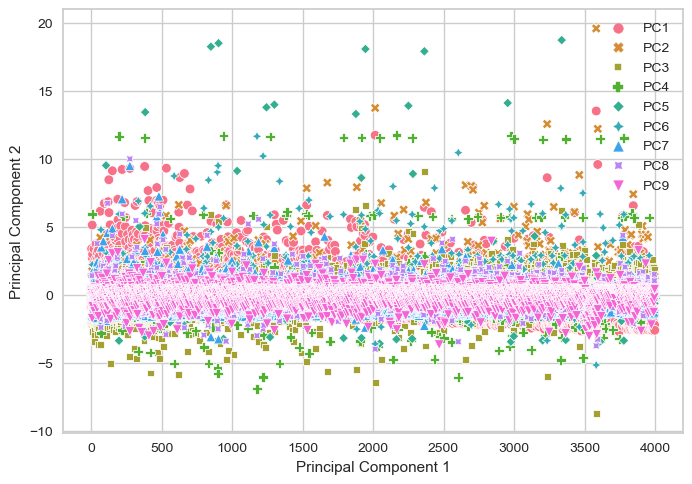

In [49]:
sns.scatterplot(pc_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [50]:
n_clusters = [2,3,4,5,6,7,8] 

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels2 = hie_cluster2.fit_predict(pca_std_df)
        silhouette_score2 = sil(pca_std_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.182556626644144
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.798739567784828
For n_clusters = 2 The average silhouette_score with linkage- average : 0.798739567784828
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8456193779284613

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.1859710557120211
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7635930601533022
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7635930601533022
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7207874487389195

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.19335400761106308
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6484324809831109
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7152354220957933
For n_c

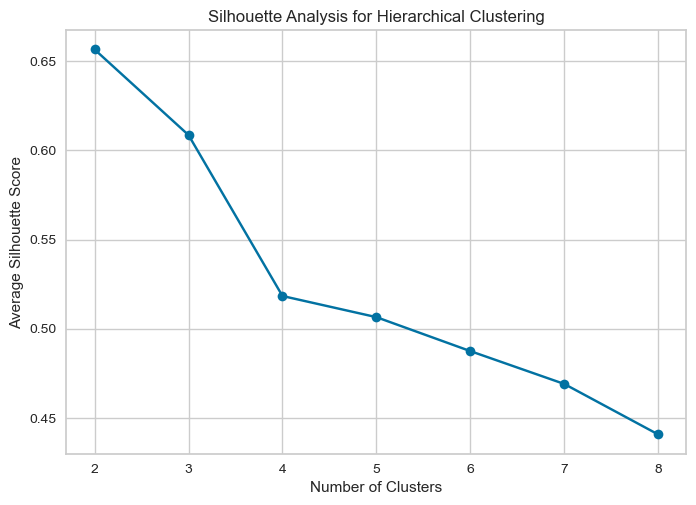

plot will show the trend of the average silhouette score as the number of clusters increases. The optimal number of clusters is typically where the average silhouette score is highest


In [51]:

n_clusters = [2, 3, 4, 5, 6, 7, 8]
linkages = ["ward", "complete", "average", "single"]

avg_silhouette_scores = []
for n in n_clusters:
    silhouette_scores = []
    for link in linkages:
        hie_cluster = AgglomerativeClustering(n_clusters=n, linkage=link)
        hie_labels = hie_cluster.fit_predict(pca_std_df)
        silhouette_score = sil(pca_std_df, hie_labels)
        silhouette_scores.append(silhouette_score)
    avg_silhouette_score = sum(silhouette_scores) / len(silhouette_scores)
    avg_silhouette_scores.append(avg_silhouette_score)

plt.plot(n_clusters, avg_silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Hierarchical Clustering')
plt.show()
print("plot will show the trend of the average silhouette score as the number of clusters increases. The optimal number of clusters is typically where the average silhouette score is highest")

 # application of PCA in MINMAX SCALED DATA 

In [52]:

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(mmx_df)

In [53]:
print(pca_minmax.singular_values_)

[33.23903239 23.19486627 19.58010291  6.55453842]


In [54]:
print(pca_minmax.explained_variance_ratio_*100)

[51.05215542 24.85999765 17.71524966  1.98518765]


In [55]:
# Perform PCA with 2 components
pca_mmx = PCA(random_state=10, n_components=0.95)
principal_components = pca_mmx.fit_transform(mmx_df)

# Create a new DataFrame with the principal components and target variable (if applicable)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
if 'Hierarchical_labels' in data.columns:
    pc_df['target'] = data['Hierarchical_labels']

# Plot the principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pc_df, x='PC1', y='PC2')

<Axes: xlabel='PC1', ylabel='PC2'>

In [56]:
pc_df

PC1       PC2       PC3       PC4
0    -0.250302  0.622581 -0.376865 -0.058722
1    -0.250116  0.620390 -0.374151 -0.051444
2    -0.244151  0.626398 -0.369357 -0.031047
3    -0.251822  0.618609 -0.375253 -0.059902
4     0.944960  0.366076  0.041185  0.052056
...        ...       ...       ...       ...
3994  0.231314 -0.852188 -0.203086 -0.067526
3995  0.229544 -0.852479 -0.204809 -0.071164
3996  0.439776 -0.734569  0.239355 -0.117990
3997 -0.624687 -0.419826  0.078628 -0.032293
3998 -0.628158 -0.421147  0.076104 -0.061014

[3999 rows x 4 columns]

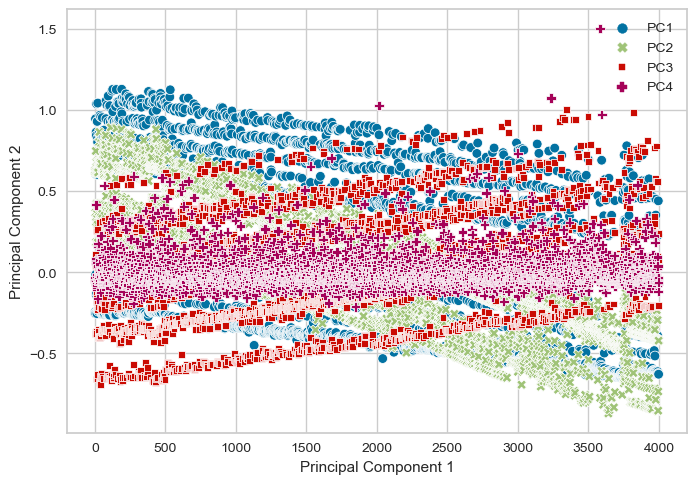

In [57]:
sns.scatterplot(pc_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [58]:
n_clusters = [2,3,4,5,6,7,8] 

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = sil(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4898979708990997
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4409716437124459
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4898979708990997
For n_clusters = 2 The average silhouette_score with linkage- single : 0.4898979708990997

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3813260038022781
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.4875578649017966
For n_clusters = 3 The average silhouette_score with linkage- average : 0.4639024871740153
For n_clusters = 3 The average silhouette_score with linkage- single : 0.4685092099562149

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4157785217870236
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.43430088381361587
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4424737263379366
For 

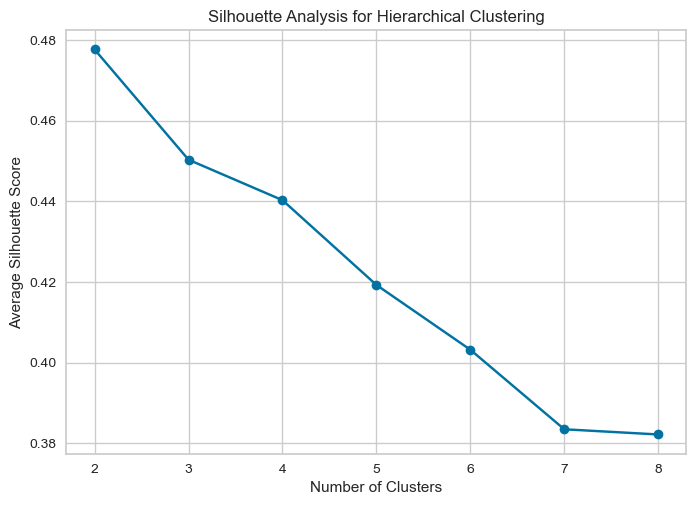

plot will show the trend of the average silhouette score as the number of clusters increases. The optimal number of clusters is typically where the average silhouette score is highest


In [59]:

n_clusters = [2, 3, 4, 5, 6, 7, 8]
linkages = ["ward", "complete", "average", "single"]

avg_silhouette_scores = []
for n in n_clusters:
    silhouette_scores = []
    for link in linkages:
        hie_cluster = AgglomerativeClustering(n_clusters=n, linkage=link)
        hie_labels = hie_cluster.fit_predict(pca_minmax_df)
        silhouette_score = sil(pca_minmax_df, hie_labels)
        silhouette_scores.append(silhouette_score)
    avg_silhouette_score = sum(silhouette_scores) / len(silhouette_scores)
    avg_silhouette_scores.append(avg_silhouette_score)

plt.plot(n_clusters, avg_silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Hierarchical Clustering')
plt.show()
print("plot will show the trend of the average silhouette score as the number of clusters increases. The optimal number of clusters is typically where the average silhouette score is highest")

# hierarchical clustering

In [60]:
# Perform Agglomerative Clustering with 2 clusters and 'ward' linkage
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)

# Print the shape of the resulting cluster labels and the labels themselves
print("Shape of cluster labels:", y_pred_hie.shape)
print("Cluster labels:", y_pred_hie)


Shape of cluster labels: (3999,)
Cluster labels: [0 0 0 ... 1 0 0]


In [61]:

from sklearn.metrics import  silhouette_score
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
score = (silhouette_score(pca_std_df, y_pred_hie)*100).round(3)
print(f"Silhouette score: {score}")

Silhouette score: 18.256


In [62]:
agg_clustering.n_clusters_

2

In [63]:
data['Hierarchical_labels'] = agg_clustering.labels_
data.head(10)

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1   28143    0           1          1          1          174           
1  2   19244    0           1          1          1          215           
2  3   41354    0           1          1          1          4123          
3  4   14776    0           1          1          1          500           
4  5   97752    0           4          1          1          43300         
5  6   16420    0           1          1          1          0             
6  7   84914    0           3          1          1          27482         
7  8   20856    0           1          1          1          5250          
8  9   443003   0           3          2          1          1753          
9  10  104860   0           3          1          1          28426         

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  award  \
0  1            0                  0                7000               0       
1  2            0                  0                6968               0       
2  4            0                  0                7034               0       
3  1            0                  0                6952               0       
4  26           2077               4                6935               1       
5  0            0                  0                6942               0       
6  25           0                  0                6994               0       
7  4            250                1                6938               1       
8  43           3850               12               6948               1       
9  28           1150               3                6931               1       

   Kmeans_label  Hierarchical_labels  
0  2             0                    
1  2             0                    
2  2             0                    
3  2             0                    
4  0             1                    
5  2             0                    
6  9             1                    
7  16            1                    
8  17            0                    
9  0             1

In [64]:
data.groupby('Hierarchical_labels').agg(['mean'])

ID        Balance  Qual_miles cc1_miles  \
                            mean           mean        mean      mean   
Hierarchical_labels                                                     
0                    2307.166475  36273.649770   7.445853    1.087558   
1                    1790.553248  102236.258506  248.956253  2.805126   

                    cc2_miles cc3_miles   Bonus_miles Bonus_trans  \
                         mean      mean          mean        mean   
Hierarchical_labels                                                 
0                    1.03341   1.000000  3109.720046   6.371544     
1                    1.00000   1.021653  27911.518338  15.614229    

                    Flight_miles_12mo Flight_trans_12 Days_since_enroll  \
                                 mean            mean              mean   
Hierarchical_labels                                                       
0                    102.221774        0.352535        3587.029954        
1                    734.558551        2.156871        4526.307998        

                        award Kmeans_label  
                         mean         mean  
Hierarchical_labels                         
0                    0.009793  4.645161     
1                    0.646929  8.907645

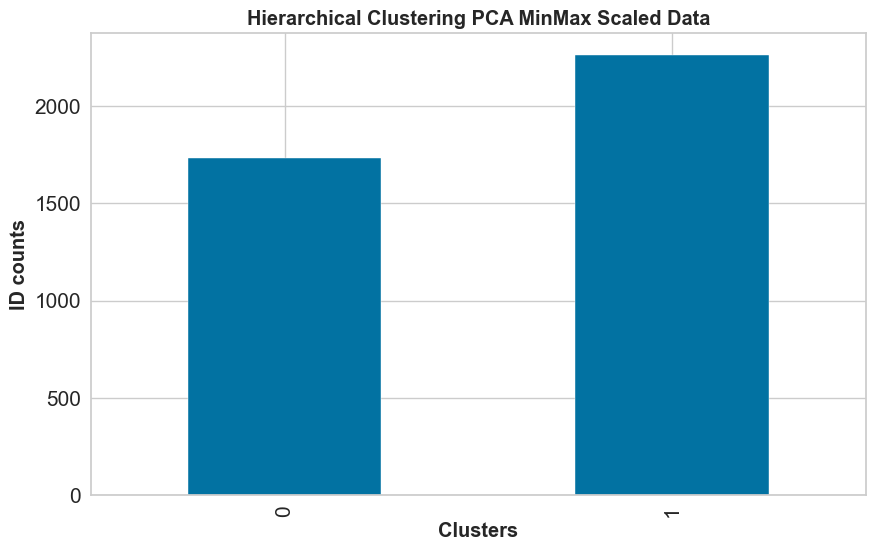

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# DBSCAN

In [66]:
eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [67]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

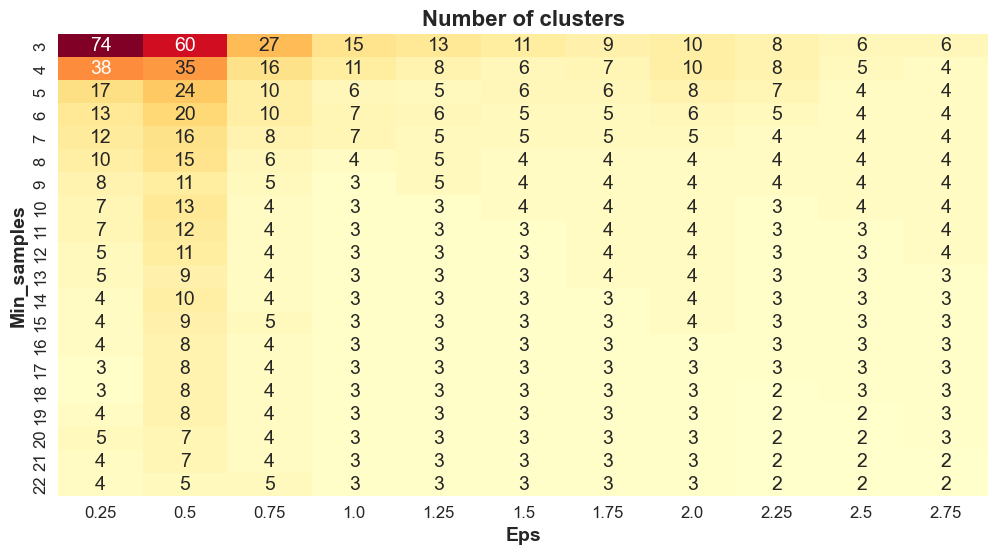

In [68]:
# Create a DataFrame from the DBSCAN parameters and number of clusters
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

# Pivot the DataFrame to create a heatmap
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

# Plot the heatmap with customized settings
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 14}, cmap="YlOrRd", fmt='.0f', cbar=False, ax=ax)
ax.set_title('Number of clusters', fontsize=16, fontweight='bold')
ax.set_xlabel('Eps', fontsize=14, fontweight='bold')
ax.set_ylabel('Min_samples', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
plt.show()


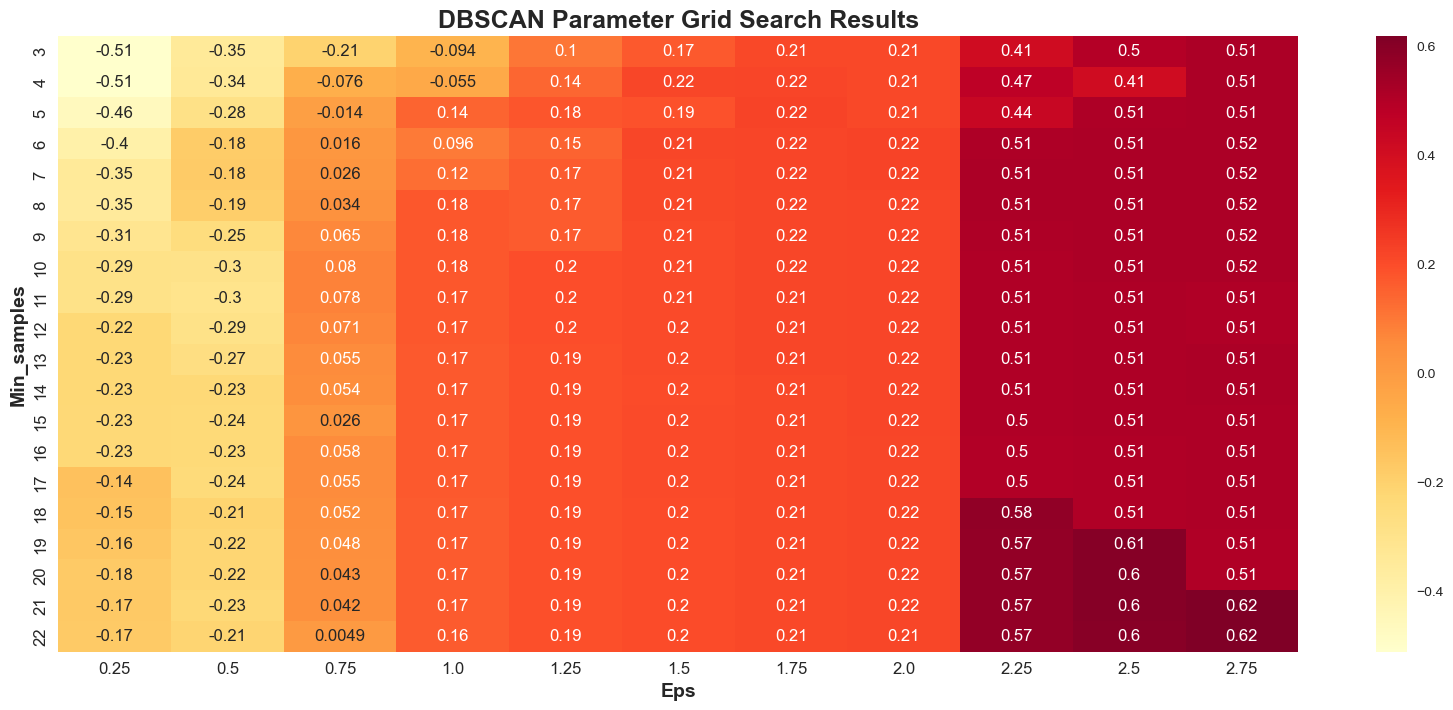

In [69]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 12}, cmap="YlOrRd", ax=ax)
ax.set_title('DBSCAN Parameter Grid Search Results', fontsize=18, fontweight='bold')
ax.set_xlabel('Eps', fontsize=14, fontweight='bold')
ax.set_ylabel('Min_samples', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


#  DBSCAN on Standard Scaled data 

In [70]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [71]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
data['DBSCAN_labels'] = dbscan.labels_
data.head()

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1   28143    0           1          1          1          174           
1  2   19244    0           1          1          1          215           
2  3   41354    0           1          1          1          4123          
3  4   14776    0           1          1          1          500           
4  5   97752    0           4          1          1          43300         

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  award  \
0  1            0                  0                7000               0       
1  2            0                  0                6968               0       
2  4            0                  0                7034               0       
3  1            0                  0                6952               0       
4  26           2077               4                6935               1       

   Kmeans_label  Hierarchical_labels  DBSCAN_labels  
0  2             0                    0              
1  2             0                    0              
2  2             0                    0              
3  2             0                    0              
4  0             1                    0

In [73]:
data.groupby('DBSCAN_labels').agg(['mean'])

ID        Balance   Qual_miles cc1_miles cc2_miles  \
                      mean           mean         mean      mean      mean   
DBSCAN_labels                                                                
-1             1717.255708  209141.000000  1508.424658  2.479452  1.26484    
 0             2032.059259  65748.632275   65.071164    2.035185  1.00000    

              cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                   mean          mean        mean              mean   
DBSCAN_labels                                                         
-1             1.223744  44253.849315  24.447489   3323.054795        
 0             1.000000  15574.245238  10.857672   294.183598         

              Flight_trans_12 Days_since_enroll     award Kmeans_label  \
                         mean              mean      mean         mean   
DBSCAN_labels                                                            
-1             9.566210        4740.178082       0.675799  10.082192     
 0             0.898942        4082.544974       0.352646  6.882011      

              Hierarchical_labels  
                             mean  
DBSCAN_labels                      
-1             0.803653            
 0             0.552116

In [74]:
data

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     1     28143    0           1          1          1          174           
1     2     19244    0           1          1          1          215           
2     3     41354    0           1          1          1          4123          
3     4     14776    0           1          1          1          500           
4     5     97752    0           4          1          1          43300         
...  ..       ...   ..          ..         ..         ..            ...         
3994  4017  18476    0           1          1          1          8525          
3995  4018  64385    0           1          1          1          981           
3996  4019  73597    0           3          1          1          25447         
3997  4020  54899    0           1          1          1          500           
3998  4021  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0     1            0                  0                7000                
1     2            0                  0                6968                
2     4            0                  0                7034                
3     1            0                  0                6952                
4     26           2077               4                6935                
...   ..            ...              ..                 ...                
3994  4            200                1                1403                
3995  5            0                  0                1395                
3996  8            0                  0                1402                
3997  1            500                1                1401                
3998  0            0                  0                1398                

      award  Kmeans_label  Hierarchical_labels  DBSCAN_labels  
0     0      2             0                    0              
1     0      2             0                    0              
2     0      2             0                    0              
3     0      2             0                    0              
4     1      0             1                    0              
...  ..     ..            ..                   ..              
3994  1      6             1                    0              
3995  1      6             1                    0              
3996  1      13            1                    0              
3997  0      1             0                    0              
3998  0      1             0                    0              

[3999 rows x 15 columns]

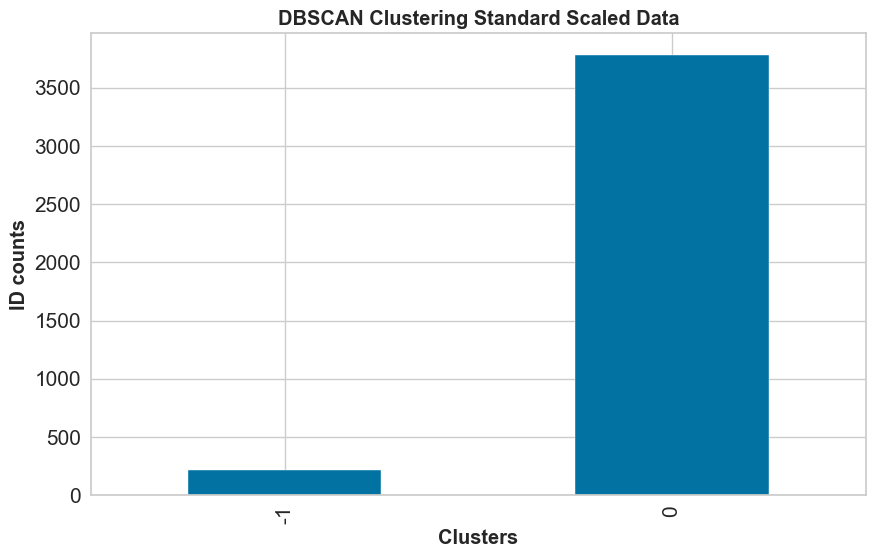

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['DBSCAN_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# DBSCAN on MinMax Scaled Data

In [76]:
eps_values = np.arange(0.25,1.25,0.25) 
min_samples = np.arange(3,23) 
DBSCAN_params = list(product(eps_values, min_samples))

In [78]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(mmx_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(mmx_df, DBS_clustering.labels_))

In [79]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlOrRd", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


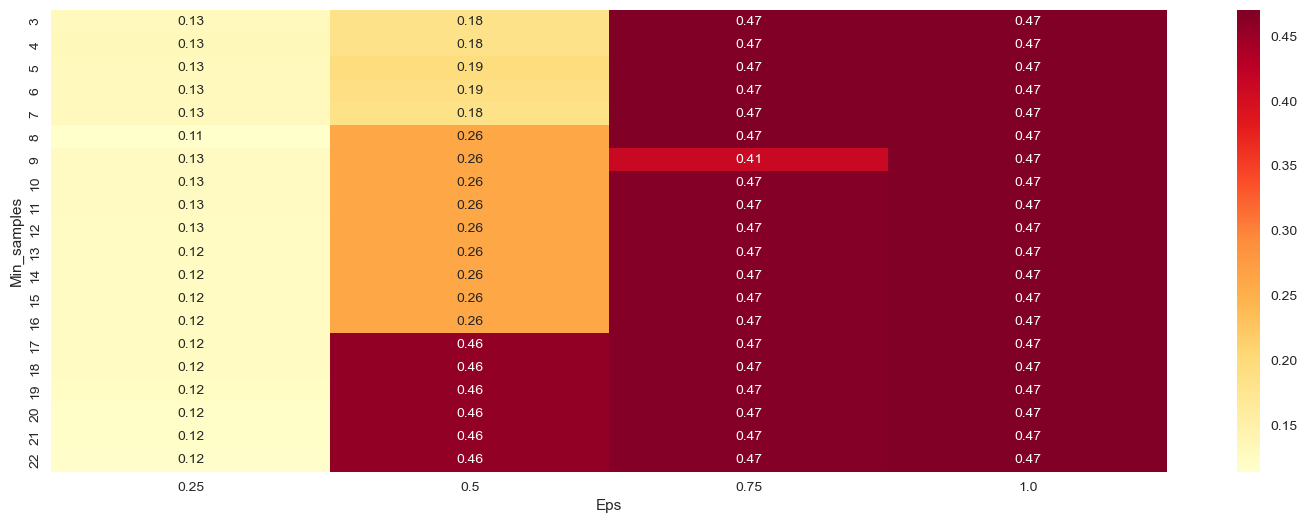

In [80]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlOrRd", ax=ax)
plt.show()


In [81]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(mmx_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(mmx_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.4702


In [82]:


# Define the range of values for epsilon and min_samples
epsilon = [0.25, 0.5, 0.75, 1]
min_samples = [3, 4, 5, 6, 7, 8, 9, 10, 11]

# Initialize variables to keep track of maximum silhouette score and its corresponding parameters
max_value = [0, 0, 0, 0]

# Initialize empty list to store silhouette scores for each parameter combination
sil_avg = []

# Loop through each combination of epsilon and min_samples values
for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        
        # Fit DBSCAN model with current parameter values
        db = DBSCAN(min_samples=min_samples[j], eps=epsilon[i]).fit(mmx_df)
        
        # Extract cluster labels and calculate silhouette score
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        silhouette_avg = sil(mmx_df, labels)
        
        # If the current silhouette score is the highest seen so far, update max_value
        if silhouette_avg > max_value[3]:
            max_value = [epsilon[i], min_samples[j], n_clusters_, silhouette_avg]
        
        # Add current silhouette score to the list
        sil_avg.append(silhouette_avg)

# Print the parameter values that resulted in the highest silhouette score
print("epsilon =", max_value[0], 
      "\nmin_samples =", max_value[1],
      "\nnumber of clusters =", max_value[2],
      "\naverage silhouette score = %.4f" % max_value[3])


epsilon = 0.75 
min_samples = 3 
number of clusters = 2 
average silhouette score = 0.4702


In [83]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(mmx_df)

DBSCAN(eps=1, min_samples=22)

In [84]:
data['DBSCAN_labels'] = dbscan.labels_
data.head()

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1   28143    0           1          1          1          174           
1  2   19244    0           1          1          1          215           
2  3   41354    0           1          1          1          4123          
3  4   14776    0           1          1          1          500           
4  5   97752    0           4          1          1          43300         

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  award  \
0  1            0                  0                7000               0       
1  2            0                  0                6968               0       
2  4            0                  0                7034               0       
3  1            0                  0                6952               0       
4  26           2077               4                6935               1       

   Kmeans_label  Hierarchical_labels  DBSCAN_labels  
0  2             0                    0              
1  2             0                    0              
2  2             0                    0              
3  2             0                    0              
4  0             1                    1

In [85]:
data.groupby('DBSCAN_labels').agg(['mean'])

ID       Balance  Qual_miles cc1_miles cc2_miles  \
                      mean          mean        mean      mean      mean   
DBSCAN_labels                                                              
0              2173.169182  59807.839555  87.602462   1.705322  1.01390    
1              1745.592843  97053.051317  240.196489  2.661715  1.01553    

              cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                   mean          mean        mean              mean   
DBSCAN_labels                                                         
0              1.008737  10227.689039  9.142971    226.292295         
1              1.018231  28905.414585  15.782579   857.501013         

              Flight_trans_12 Days_since_enroll award Kmeans_label  \
                         mean              mean  mean         mean   
DBSCAN_labels                                                        
0              0.652502        3820.652105       0.0   6.042494      
1              2.599595        4625.062120       1.0   8.782579      

              Hierarchical_labels  
                             mean  
DBSCAN_labels                      
0              0.317315            
1              0.988521

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['DBSCAN_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [87]:
cluster1 = pd.DataFrame(data.loc[data.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(data.loc[data.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [88]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df



Cluster1_avg  Cluster2_avg
ID                   2173.169182   1745.592843 
Balance              59807.839555  97053.051317
Qual_miles           87.602462     240.196489  
cc1_miles            1.705322      2.661715    
cc2_miles            1.013900      1.015530    
cc3_miles            1.008737      1.018231    
Bonus_miles          10227.689039  28905.414585
Bonus_trans          9.142971      15.782579   
Flight_miles_12mo    226.292295    857.501013  
Flight_trans_12      0.652502      2.599595    
Days_since_enroll    3820.652105   4625.062120 
award                0.000000      1.000000    
Kmeans_label         6.042494      8.782579    
Hierarchical_labels  0.317315      0.988521    
DBSCAN_labels        0.000000      1.000000

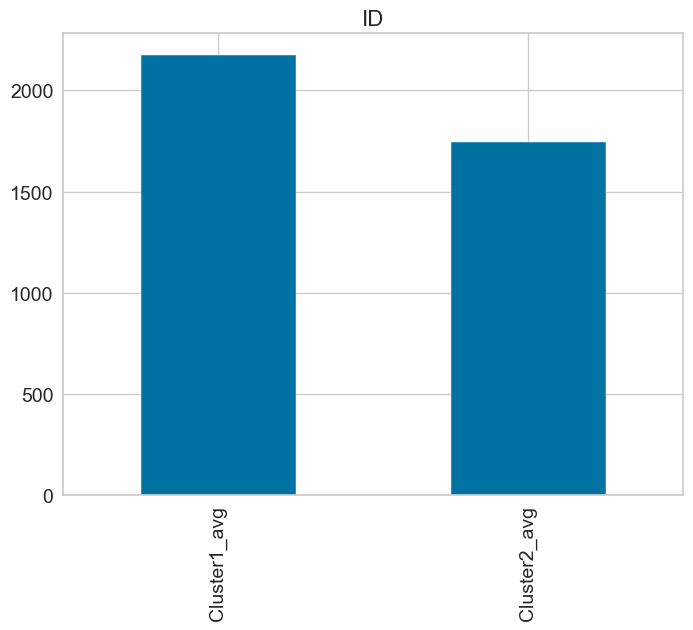

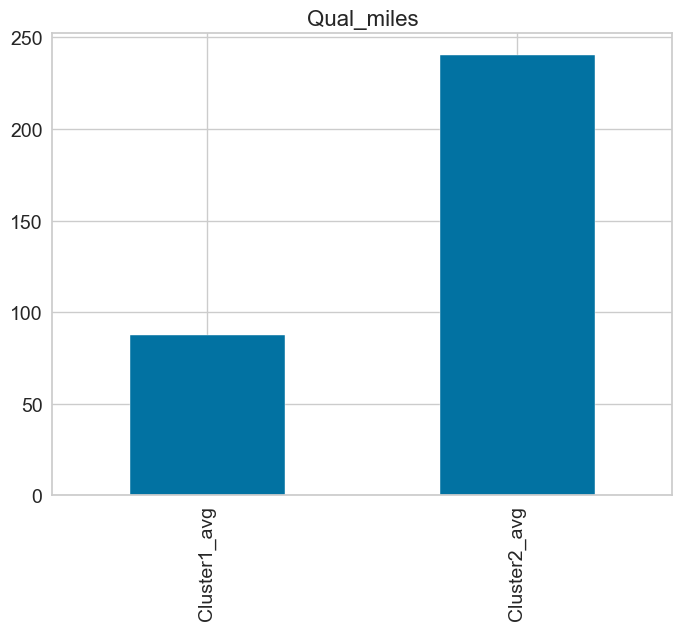

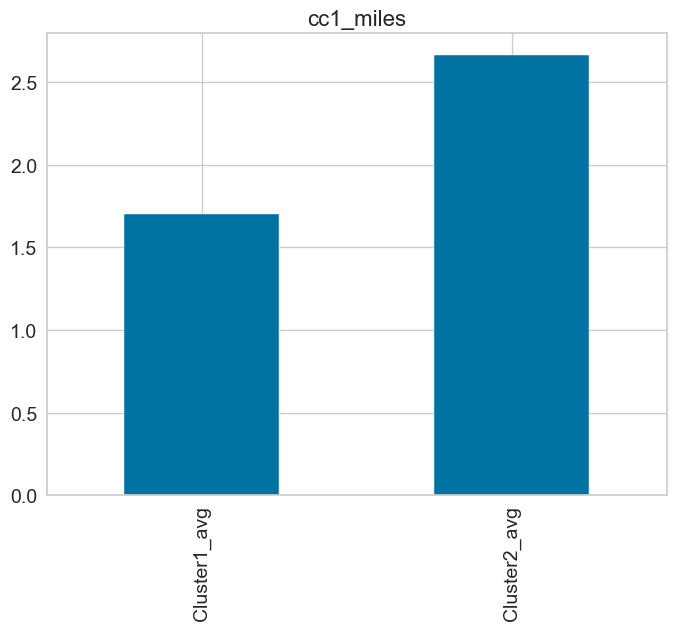

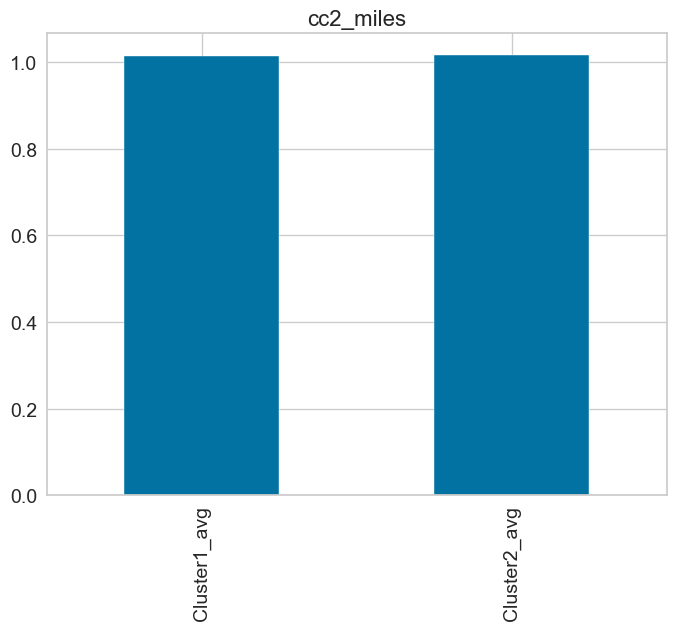

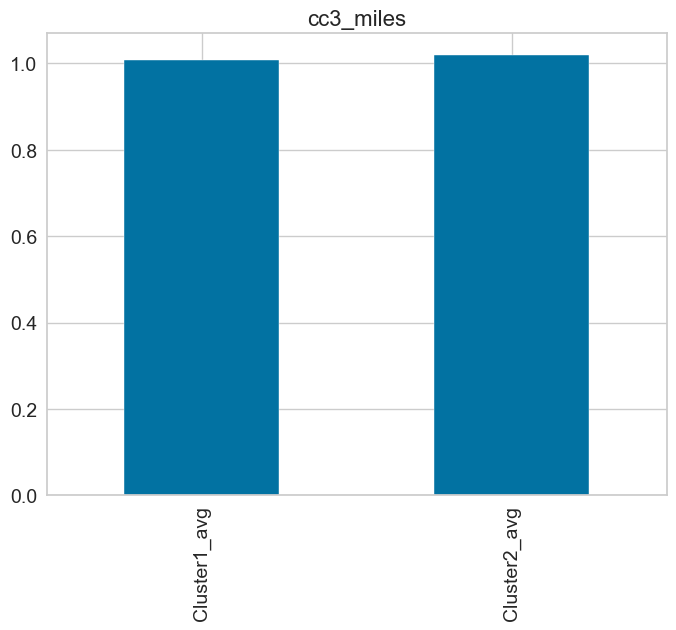

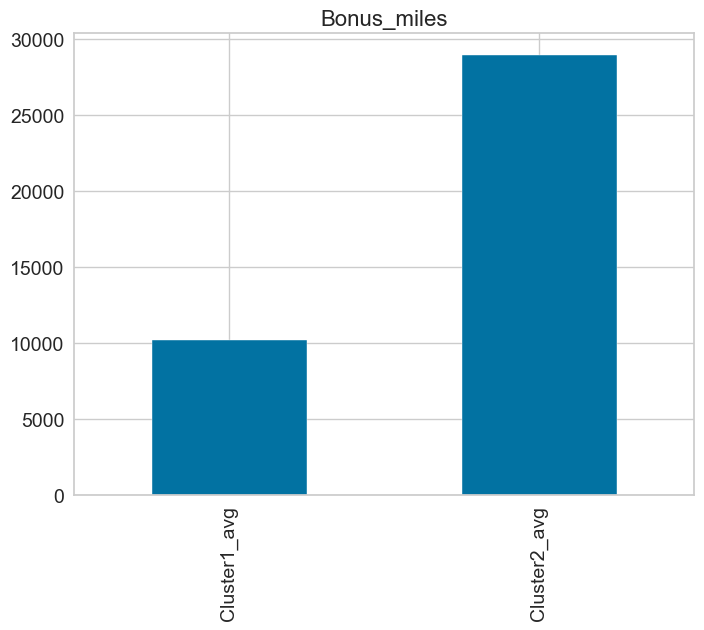

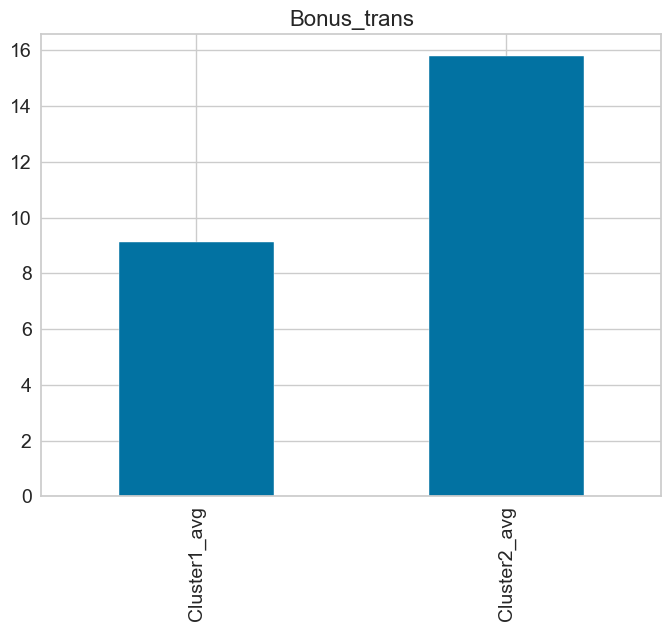

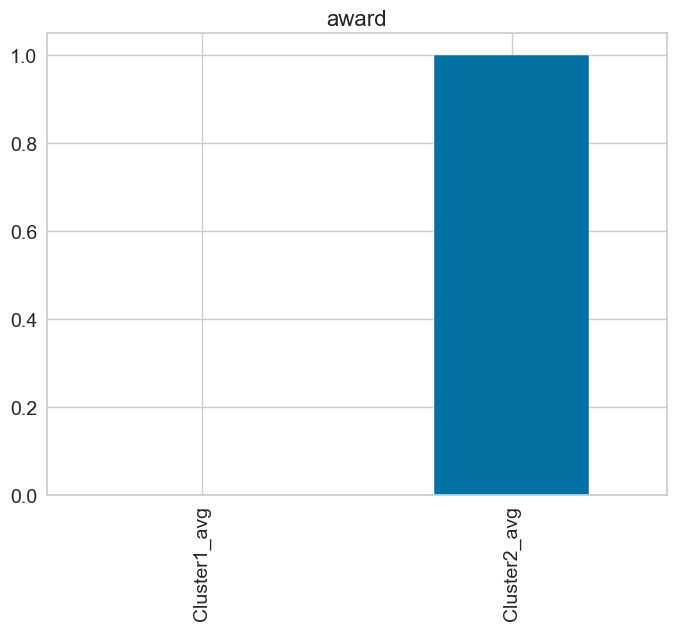

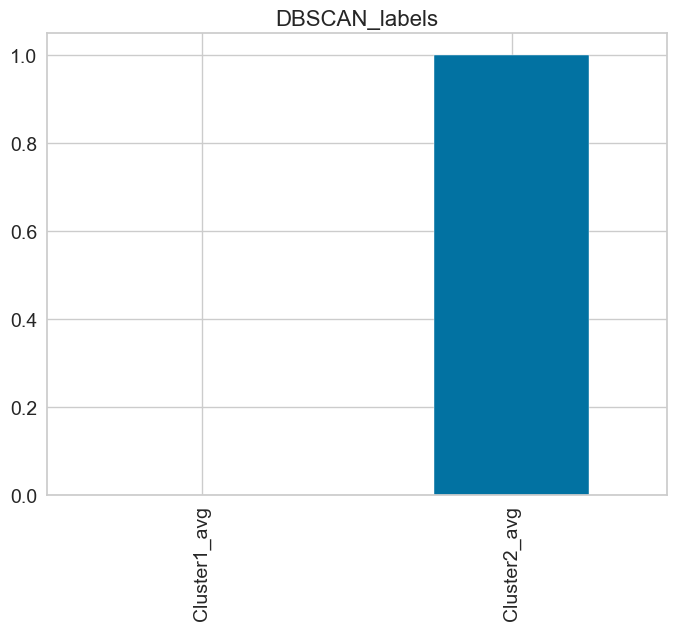

In [89]:
for i , row in avg_df.iterrows():
    plt.figure(figsize=(8,6))
    j = avg_df.xs(i, axis=0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar', fontsize=14)
    plt.show()
